### Problem Statement

X Education, an online education company, attracts industry professionals to its courses through various marketing channels. Once on the website, visitors can explore courses, fill out forms, or engage with content. Leads are generated when visitors share contact information. Leads also come from referrals. The sales team contacts leads, aiming for conversion. The current conversion rate is 30%. To boost efficiency, X Education aims to identify 'Hot Leads' with high conversion potential, enhancing the conversion rate. The process is visualized as a funnel.

X Education seeks assistance in creating a lead scoring model to identify high-potential leads likely to convert into paying customers. Your task is to assign lead scores reflecting conversion probabilities, with higher scores indicating higher chances of conversion. The CEO targets an approximate 80% lead conversion rate.

### Step 1: Importing and understanding the data

In [1]:
import numpy as np
import pandas as pd

# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: purple; }</style>"))

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Find the shape of the dataframe
df.shape

(9240, 37)

In [5]:
# Find the statistical information about the dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Find the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Data Cleaning

In [7]:
# Check for duplicate data in the dataframe
df.duplicated().sum()

0

In [8]:
# Rename column variables
df.rename(columns={'Lead Number':'Lead_Number','Lead Origin':'Lead_Origin','Lead Source':'Lead_Source',
                   'Do Not Email':'Do_Not_Email','Do Not Call':'Do_Not_Call','TotalVisits':'Total_Visits',
                   'Total Time Spent on Website':'Time_on_Website','Page Views Per Visit':'Page_Views_Per_Visit', 
                   'Last Activity':'Last_Activity','How did you hear about X Education':'Source',
                   'What is your current occupation':'Occupation','What matters most to you in choosing a course':'Course_Selection_Reason', 
                   'Newspaper Article':'Newspaper_Article', 'X Education Forums':'X_Education_Forums', 
                   'Digital Advertisement':'Digital_Ad', 'Through Recommendations':'Via_Recommendations',
                   'Receive More Updates About Our Courses':'Receive_Course_updates','Lead Quality':'Lead_Quality',
                   'Update me on Supply Chain Content':'Update_Supply_Chain_Content', 'Get updates on DM Content':'DM_Content_Update',
                   'Lead Profile':'Lead_Profile', 'City':'City', 'Asymmetrique Activity Index':'Asymmetrique_Activity_Index',
                   'Asymmetrique Profile Index':'Asymmetrique_Profile_Index', 'Asymmetrique Activity Score':'Asymmetrique_Activity_Score',
                   'Asymmetrique Profile Score':'Asymmetrique_Profile_Score','I agree to pay the amount through cheque':'Cheque_Payment',
                   'A free copy of Mastering The Interview':'FreeCopy_MasteringInterview', 'Last Notable Activity':'Last_Notable_Activity'},inplace=True)

In [9]:
# Few categorical columns has 'Select' level. Replace by Null.
# Select all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
c = df_obj.columns[df_obj.apply(s).any()].tolist()
print (c)

['Specialization', 'Source', 'Lead_Profile', 'City']


In [10]:
columns_to_replace = ['Specialization', 'Source', 'Lead_Profile', 'City']
df[columns_to_replace] = df[columns_to_replace].replace('Select', np.NaN)

In [11]:
# Calculate percentage of null values for each column
df_per = (df.isnull().sum() / df.shape[0]) * 100
df_per

Prospect ID                     0.000000
Lead_Number                     0.000000
Lead_Origin                     0.000000
Lead_Source                     0.389610
Do_Not_Email                    0.000000
Do_Not_Call                     0.000000
Converted                       0.000000
Total_Visits                    1.482684
Time_on_Website                 0.000000
Page_Views_Per_Visit            1.482684
Last_Activity                   1.114719
Country                        26.634199
Specialization                 36.580087
Source                         78.463203
Occupation                     29.112554
Course_Selection_Reason        29.318182
Search                          0.000000
Magazine                        0.000000
Newspaper_Article               0.000000
X_Education_Forums              0.000000
Newspaper                       0.000000
Digital_Ad                      0.000000
Via_Recommendations             0.000000
Receive_Course_updates          0.000000
Tags            

#### Observation:
1.To remove missing values > 33%
2.To Remove sales augmented and irrelevant variables

#### Missing Value Treatment

In [12]:
# Drop variables
#Columns with high percentage of missing values (> 40%).  
df_per_33 = df_per[df_per > 33] 
df_per_33

Specialization                 36.580087
Source                         78.463203
Tags                           36.287879
Lead_Quality                   51.590909
Lead_Profile                   74.188312
City                           39.707792
Asymmetrique_Activity_Index    45.649351
Asymmetrique_Profile_Index     45.649351
Asymmetrique_Activity_Score    45.649351
Asymmetrique_Profile_Score     45.649351
dtype: float64

In [13]:
#Creating a list for variables >=33%
df_33 = list(df_per_33.index)
df_33

['Specialization',
 'Source',
 'Tags',
 'Lead_Quality',
 'Lead_Profile',
 'City',
 'Asymmetrique_Activity_Index',
 'Asymmetrique_Profile_Index',
 'Asymmetrique_Activity_Score',
 'Asymmetrique_Profile_Score']

In [14]:
#Remove the columns having more than 33% null/missing values.
df.drop(df_33, axis = 1, inplace = True)

In [15]:
df.shape

(9240, 27)

In [16]:
# Drop Prospect ID
df.drop('Prospect ID', axis=1, inplace=True)

In [17]:
# Calculate missing value %
df_per1 = (df.isnull().sum() / df.shape[0]) * 100
df_per1 = df_per1[df_per1>0]
df_per1

Lead_Source                 0.389610
Total_Visits                1.482684
Page_Views_Per_Visit        1.482684
Last_Activity               1.114719
Country                    26.634199
Occupation                 29.112554
Course_Selection_Reason    29.318182
dtype: float64

#### Observation:
There are 7 variables with null values.Either it could be imputed or removed.For categorical variable we can use mode() to impute and for quantitative variable we can use mode() to impute.

#### Course_Selection_Reason

In [18]:
df['Course_Selection_Reason'].value_counts(normalize = True, dropna = False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: Course_Selection_Reason, dtype: float64

In [19]:
mode_Course_Selection_Reason = df['Course_Selection_Reason'].mode()[0]
df['Course_Selection_Reason'].fillna(mode_Course_Selection_Reason,inplace=True)

#### Occupation

In [20]:
df['Occupation'].value_counts(normalize = True, dropna = False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [21]:
# Impute missings values in 'Occupation' with 'Others'
df['Occupation'].fillna('Other', inplace=True)

#### Country

In [22]:
df['Country'].value_counts(normalize = True, dropna = False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [23]:
df.drop(['Country'],axis=1,inplace=True) # Drop since its skewed

#### Last_Activity

In [24]:
df['Last_Activity'].value_counts(normalize = True, dropna = False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last_Activity, dtype: float64

In [25]:
mode_last_activity = df['Last_Activity'].mode()[0]
df['Last_Activity'].fillna(mode_last_activity,inplace=True)

##### Page_Views_Per_Visit , Total_Visits, Lead_Source

The above three variables has less than 1.5%. Hence, we will drop them.

In [26]:
df.dropna(inplace=True)

#### Rechecking shape and percentage of missing values

In [27]:
df.shape

(9074, 25)

In [28]:
df_per = (df.isnull().sum() / df.shape[0]) * 100
df_per

Lead_Number                    0.0
Lead_Origin                    0.0
Lead_Source                    0.0
Do_Not_Email                   0.0
Do_Not_Call                    0.0
Converted                      0.0
Total_Visits                   0.0
Time_on_Website                0.0
Page_Views_Per_Visit           0.0
Last_Activity                  0.0
Occupation                     0.0
Course_Selection_Reason        0.0
Search                         0.0
Magazine                       0.0
Newspaper_Article              0.0
X_Education_Forums             0.0
Newspaper                      0.0
Digital_Ad                     0.0
Via_Recommendations            0.0
Receive_Course_updates         0.0
Update_Supply_Chain_Content    0.0
DM_Content_Update              0.0
Cheque_Payment                 0.0
FreeCopy_MasteringInterview    0.0
Last_Notable_Activity          0.0
dtype: float64

#### Checking marketing augmented variables
Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Ad

In [29]:
df_marketing = ['Search','Magazine','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Ad']
for col in df_marketing:
    print('--------------------------------------------------')
    print(df[col].astype('category').value_counts())

--------------------------------------------------
No     9060
Yes      14
Name: Search, dtype: int64
--------------------------------------------------
No    9074
Name: Magazine, dtype: int64
--------------------------------------------------
No     9072
Yes       2
Name: Newspaper_Article, dtype: int64
--------------------------------------------------
No     9073
Yes       1
Name: X_Education_Forums, dtype: int64
--------------------------------------------------
No     9073
Yes       1
Name: Newspaper, dtype: int64
--------------------------------------------------
No     9070
Yes       4
Name: Digital_Ad, dtype: int64


#### Observation:
All the marketing augmented variables are skewed on the 'No' side. This will not provide any insight to our analysis and hence we will drop the variables.

In [30]:
df.drop(df_marketing,axis=1,inplace=True)

#### Via_Recommendations

In [31]:
df['Via_Recommendations'].value_counts()

No     9067
Yes       7
Name: Via_Recommendations, dtype: int64

#### Observation:
Recommendation variable is highly skewed to the 'No' side. Hence, we remove the variable from the dataframe.

In [32]:
df.drop(['Via_Recommendations'],axis=1,inplace=True)

#### Customer Engagements
Receive_Course_updates,Update_Supply_Chain_Content,DM_Content_Update,Cheque_Payment,FreeCopy_MasteringInterview,Last_Notable_Activity

In [33]:
df_customer_engagements = ['Receive_Course_updates','Update_Supply_Chain_Content','DM_Content_Update',
                           'Cheque_Payment','FreeCopy_MasteringInterview','Last_Notable_Activity']
for col in df_customer_engagements:
    print('--------------------------------------------------')
    print(df[col].astype('category').value_counts())
    

--------------------------------------------------
No    9074
Name: Receive_Course_updates, dtype: int64
--------------------------------------------------
No    9074
Name: Update_Supply_Chain_Content, dtype: int64
--------------------------------------------------
No    9074
Name: DM_Content_Update, dtype: int64
--------------------------------------------------
No    9074
Name: Cheque_Payment, dtype: int64
--------------------------------------------------
No     6186
Yes    2888
Name: FreeCopy_MasteringInterview, dtype: int64
--------------------------------------------------
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approac

#### Observation:
The variables 'Receive_Course_updates','Update_Supply_Chain_Content','DM_Content_Update','Cheque_Payment' are highly skewed.Hence drop the variables.

In [34]:
df.drop(['Receive_Course_updates','Update_Supply_Chain_Content','DM_Content_Update','Cheque_Payment'],axis=1,inplace=True)

#### Checking Leads_Origin and Leads_Source

In [35]:
leads = ['Lead_Origin','Lead_Source']
for col in leads:
    print('---------------------------------------')
    print(df[col].astype('category').value_counts())

---------------------------------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead_Origin, dtype: int64
---------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead_Source, dtype: int64


#### Observation:
In Lead_Source, Google and google are similar.Hence, we can bin together.

In [36]:
df['Lead_Source']=df['Lead_Source'].replace(['google'],'Google')

#### Customer Subscription

In [37]:
subsription =['Do_Not_Email','Do_Not_Call']
for col in subsription:
    print('------------------------------------------')
    print(df[col].astype('category').value_counts())

------------------------------------------
No     8358
Yes     716
Name: Do_Not_Email, dtype: int64
------------------------------------------
No     9072
Yes       2
Name: Do_Not_Call, dtype: int64


#### Observation:
There's a stronger customer inclination towards unsubscription.'Do_Not_Call' is heavily skewed and hence we can drop.

In [38]:
df.drop(['Do_Not_Call'],axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead_Number                  9074 non-null   int64  
 1   Lead_Origin                  9074 non-null   object 
 2   Lead_Source                  9074 non-null   object 
 3   Do_Not_Email                 9074 non-null   object 
 4   Converted                    9074 non-null   int64  
 5   Total_Visits                 9074 non-null   float64
 6   Time_on_Website              9074 non-null   int64  
 7   Page_Views_Per_Visit         9074 non-null   float64
 8   Last_Activity                9074 non-null   object 
 9   Occupation                   9074 non-null   object 
 10  Course_Selection_Reason      9074 non-null   object 
 11  FreeCopy_MasteringInterview  9074 non-null   object 
 12  Last_Notable_Activity        9074 non-null   object 
dtypes: float64(2), int

### Outlier detection and Handling

In [40]:
# Analyize the statistical data of the dataframe
df.describe()

Lead_Number    Converted  Total_Visits  Time_on_Website  \
count    9074.000000  9074.000000   9074.000000      9074.000000   
mean   617032.619352     0.378554      3.456028       482.887481   
std     23348.029512     0.485053      4.858802       545.256560   
min    579533.000000     0.000000      0.000000         0.000000   
25%    596406.000000     0.000000      1.000000        11.000000   
50%    615278.500000     0.000000      3.000000       246.000000   
75%    637176.500000     1.000000      5.000000       922.750000   
max    660737.000000     1.000000    251.000000      2272.000000   

       Page_Views_Per_Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

In [41]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Lead_Number    Converted  Total_Visits  Time_on_Website  \
count    9074.000000  9074.000000   9074.000000      9074.000000   
mean   617032.619352     0.378554      3.456028       482.887481   
std     23348.029512     0.485053      4.858802       545.256560   
min    579533.000000     0.000000      0.000000         0.000000   
25%    596406.000000     0.000000      1.000000        11.000000   
50%    615278.500000     0.000000      3.000000       246.000000   
75%    637176.500000     1.000000      5.000000       922.750000   
90%    650276.800000     1.000000      7.000000      1373.000000   
95%    655344.450000     1.000000     10.000000      1557.000000   
99%    659563.350000     1.000000     17.000000      1839.000000   
max    660737.000000     1.000000    251.000000      2272.000000   

       Page_Views_Per_Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

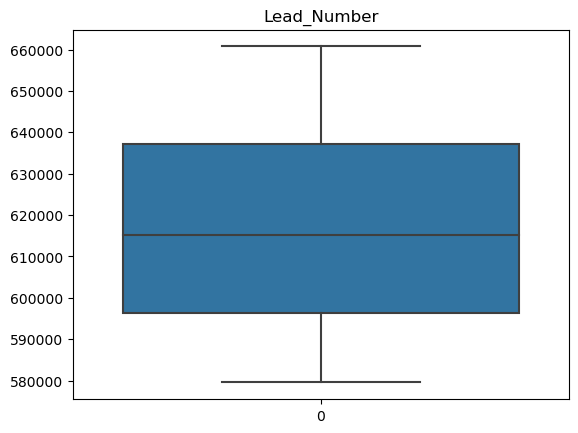

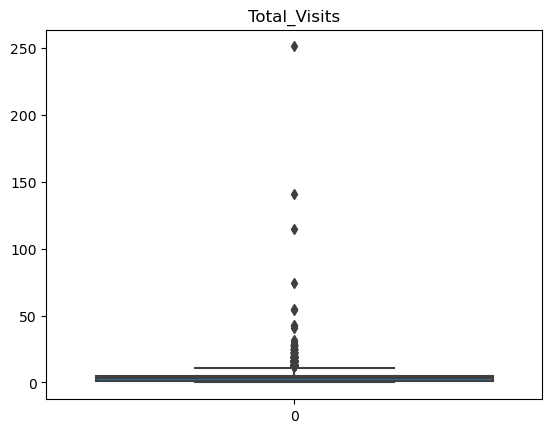

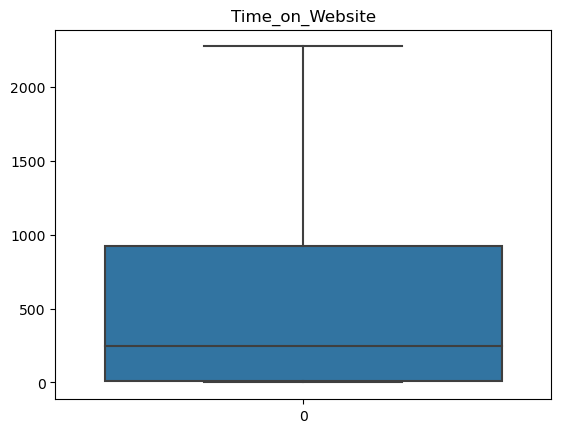

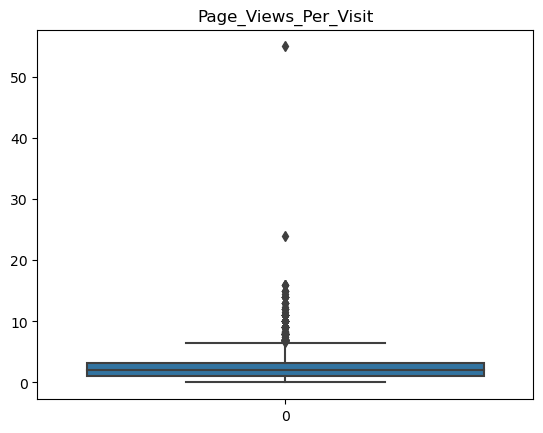

In [42]:
cont_var = ['Lead_Number','Total_Visits','Time_on_Website','Page_Views_Per_Visit']
for i in cont_var:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

#### Observation:
As we have detected the outliers, we wil remove the outliers above the 95th percentile

In [43]:
df = df[df['Total_Visits'] <= 10]

In [44]:
df = df[df['Page_Views_Per_Visit'] <= 6]

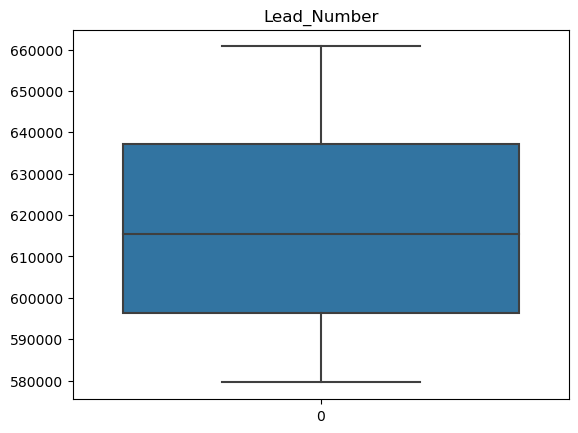

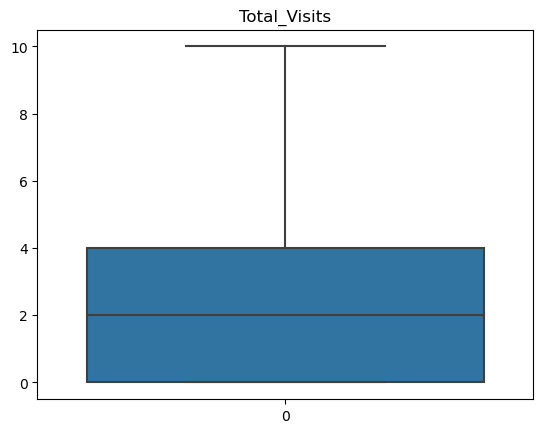

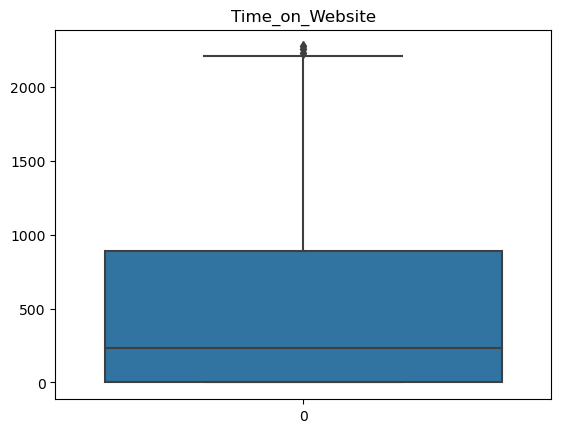

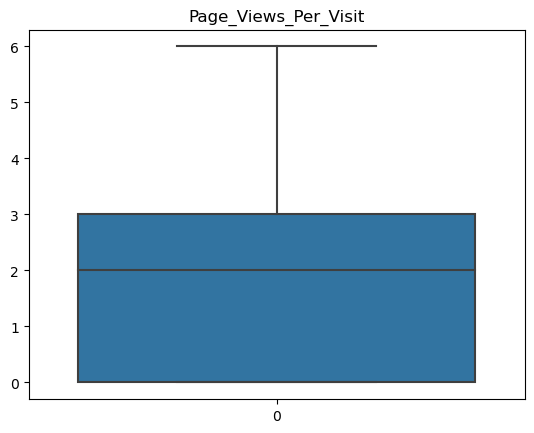

In [45]:
for i in cont_var:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [46]:
df.shape

(8445, 13)

### Step 3: EDA Analysis

### Univariate and Bivariate Analysis

### Categorical Variable

##### Converted

In [47]:
df['Converted'].value_counts()

0    5280
1    3165
Name: Converted, dtype: int64

In [48]:
# Lead conversion ratio
df_convertion = (sum(df['Converted'])/len(df['Converted'].index))*100
df_convertion

37.47779751332149

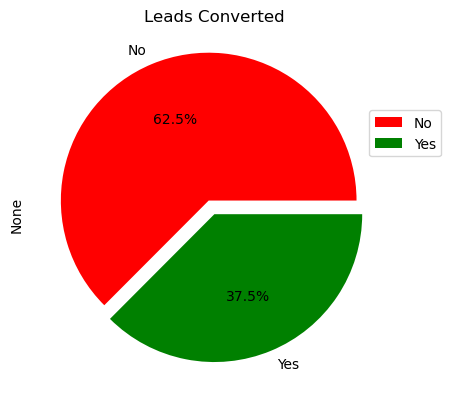

In [49]:
# Plotting pie chart for converted.
explode = (0.1, 0)
df.groupby('Converted').size().plot(kind='pie', legend=True, labels= ["No", "Yes"],  explode=explode, autopct='%1.1f%%',colors=['red', 'green'])
plt.title('Leads Converted')
plt.legend(bbox_to_anchor=(0.9,0.8))
plt.show()

#### Observation: 
The lead convertion success rate is 37.5%. Around 62.5% of the leads are not converted.

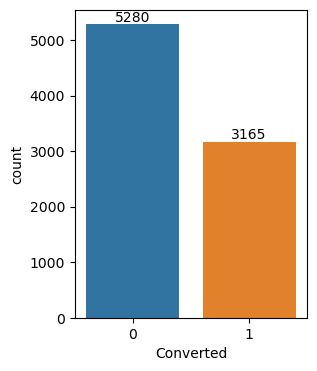

In [50]:
#Ploting the total convertion ratio
plt.figure(figsize = (3,4))
ax = sns.countplot(x=df["Converted"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead_Number                  8445 non-null   int64  
 1   Lead_Origin                  8445 non-null   object 
 2   Lead_Source                  8445 non-null   object 
 3   Do_Not_Email                 8445 non-null   object 
 4   Converted                    8445 non-null   int64  
 5   Total_Visits                 8445 non-null   float64
 6   Time_on_Website              8445 non-null   int64  
 7   Page_Views_Per_Visit         8445 non-null   float64
 8   Last_Activity                8445 non-null   object 
 9   Occupation                   8445 non-null   object 
 10  Course_Selection_Reason      8445 non-null   object 
 11  FreeCopy_MasteringInterview  8445 non-null   object 
 12  Last_Notable_Activity        8445 non-null   object 
dtypes: float64(2), int

#### Lead_Origin

In [52]:
df['Lead_Origin'].value_counts()

Landing Page Submission    4407
API                        3433
Lead Add Form               576
Lead Import                  29
Name: Lead_Origin, dtype: int64

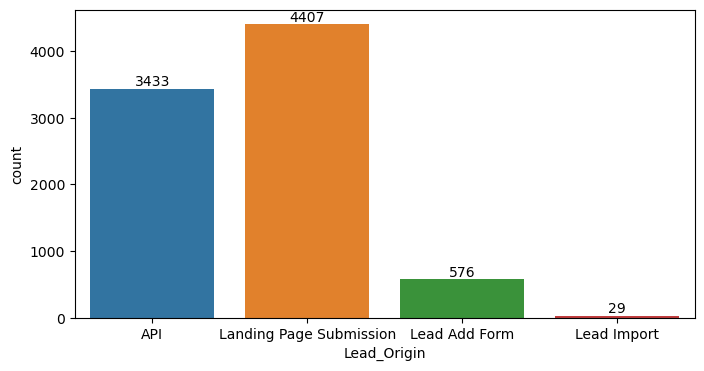

In [53]:
# Ploting total count of  lead_origin
plt.figure(figsize = (8,4))
ax = sns.countplot(x=df["Lead_Origin"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

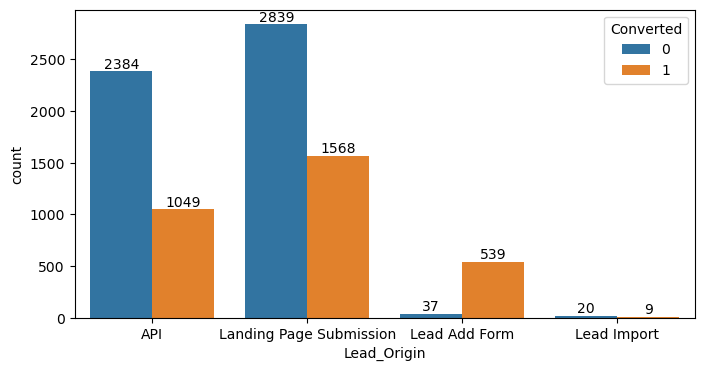

In [54]:
# Ploting total count of  lead_origin w.r.t Converted
plt.figure(figsize = (8,4))
ax = sns.countplot(data = df, x=df["Lead_Origin"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Observation:
The leads coming from the landing page and the API has the highest convertion rate of 35.5% and 30.5% respectively.
The lead Add Form has the highest convertion rate of 93%
The lead import is not successful for lead convertion

#### Lead_Source

In [55]:
df['Lead_Source'].value_counts()

Google               2714
Direct Traffic       2349
Olark Chat           1742
Organic Search        919
Reference             440
Welingak Website      128
Referral Sites        102
Facebook               30
bing                    6
Click2call              3
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead_Source, dtype: int64

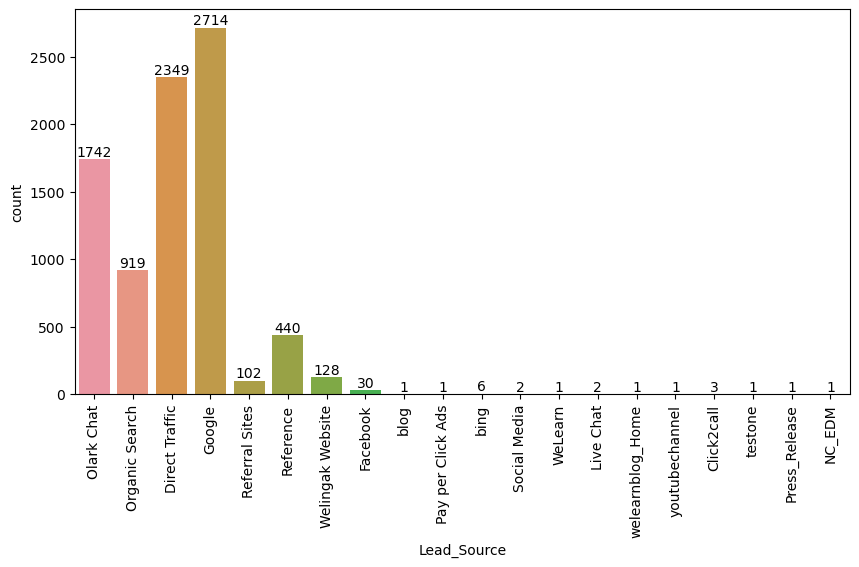

In [56]:
# Ploting total count of lead Source:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=df["Lead_Source"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

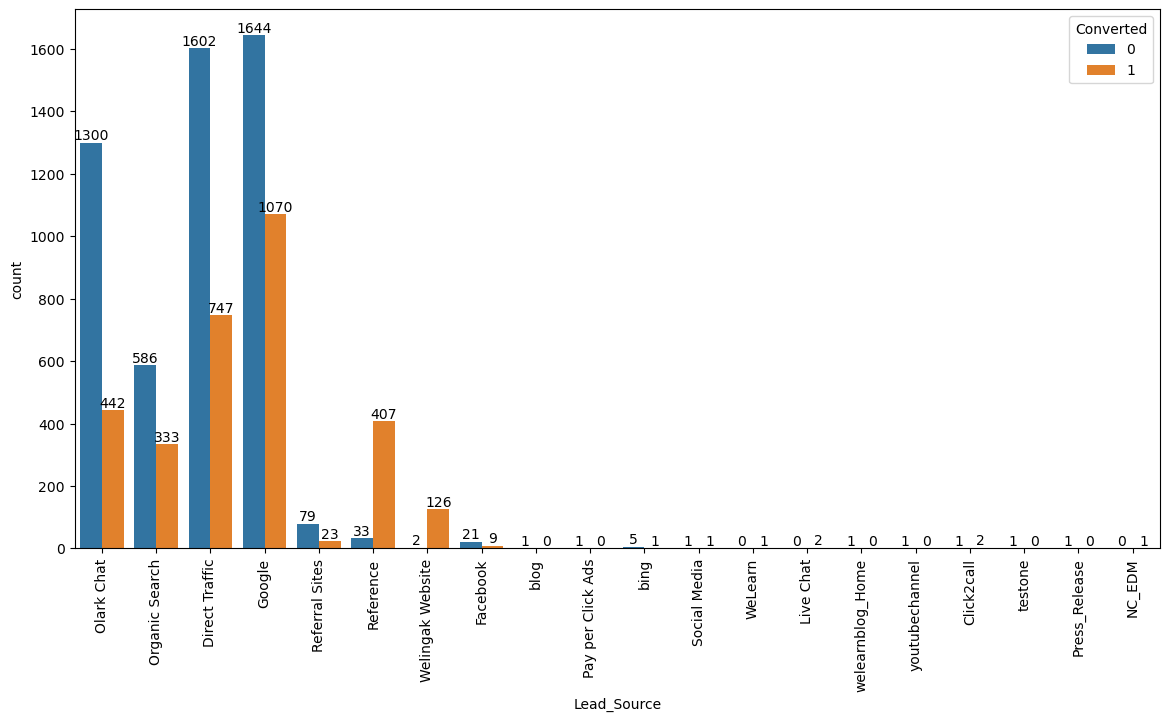

In [57]:
# Ploting total count of  lead_Source w.r.t Converted.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = df, x=df['Lead_Source'], hue = 'Converted')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### Observation:
Google traffic has the highest lead_Source followed by Direct_Traffic of 39%.
Reference has the highest convertion rate of 92.5%
Direct Traffic has 31%
Olark Chat 25%
Organic Search 36%


#### Do_Not_Email

In [58]:
df["Do_Not_Email"].value_counts()

No     7795
Yes     650
Name: Do_Not_Email, dtype: int64

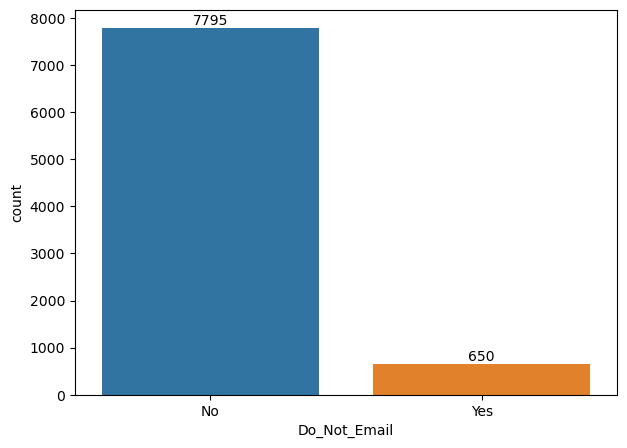

In [59]:
# Ploting total count for Do_Not_Email
plt.figure(figsize = (7,5))
ax = sns.countplot(x=df["Do_Not_Email"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

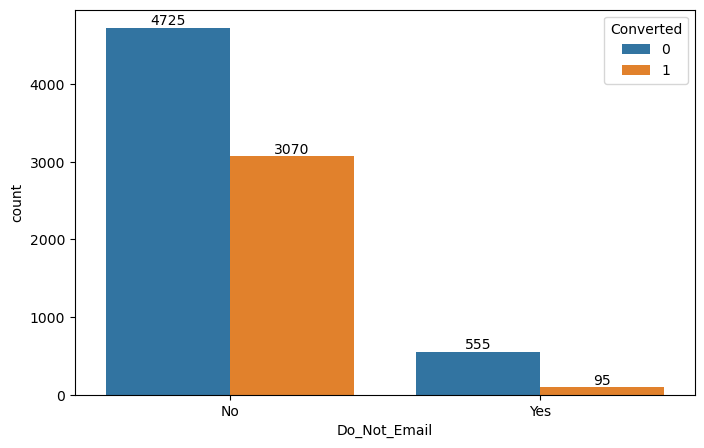

In [60]:
# Ploting total count of  Do_Not_Email w.r.t Converted
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df, x=df["Do_Not_Email"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Observation:
Though 'Do_Not_Email' has been selected by the customers, there seems a high convertion rate of 40% compared to the customers who has a convertion rate of 15% said 'Yes'

#### Last Activity

In [61]:
# Counts of unique values in Last_Activity
df['Last_Activity'].value_counts()

Email Opened                    3184
SMS Sent                        2537
Olark Chat Conversation          944
Page Visited on Website          513
Converted to Lead                425
Email Bounced                    302
Email Link Clicked               254
Form Submitted on Website        110
Unreachable                       84
Unsubscribed                      57
Had a Phone Conversation          20
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

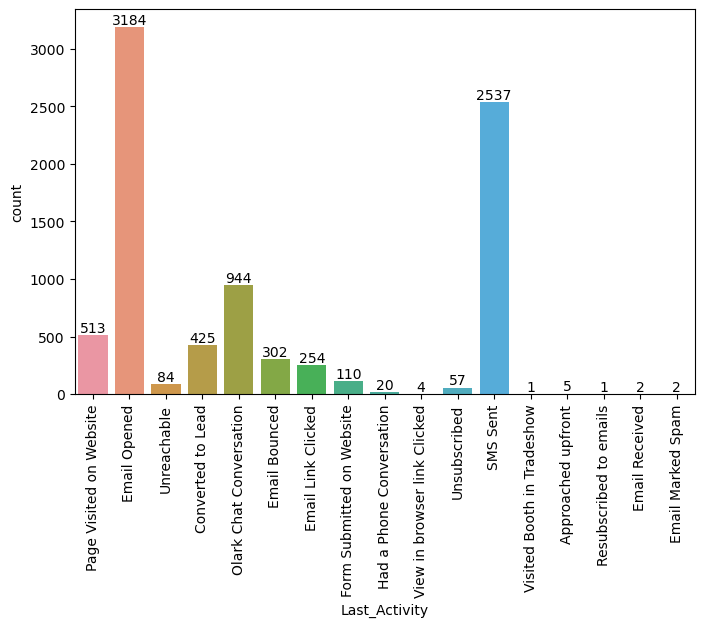

In [62]:
# Ploting total count of Last_Activity:
plt.figure(figsize = (8,5))
ax = sns.countplot(x=df['Last_Activity'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

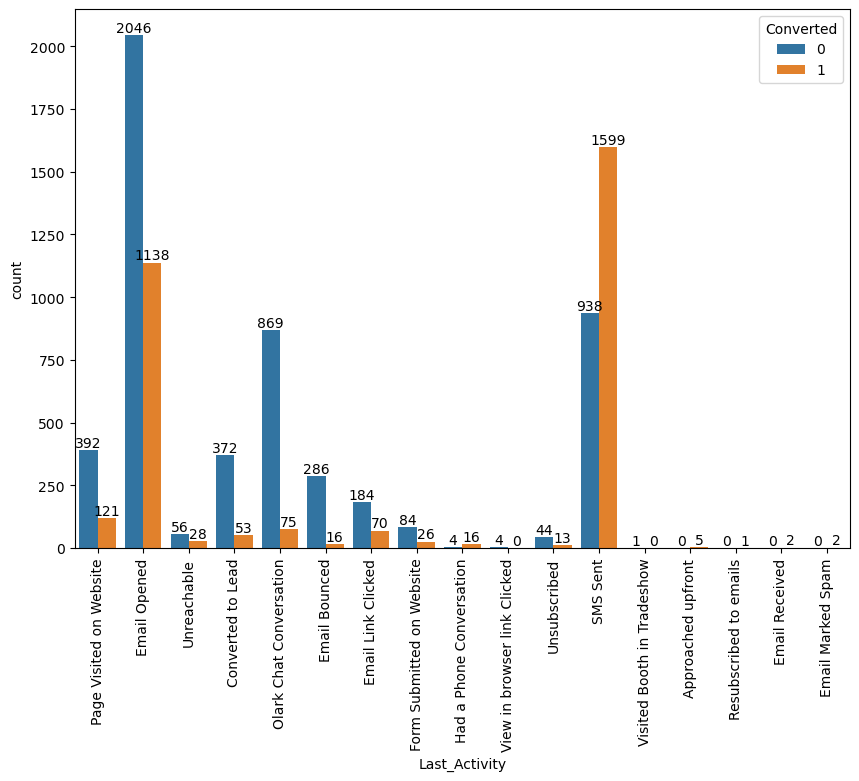

In [63]:
# Ploting total count of Last_Activity W.r.t Converted
plt.figure(figsize = (10,7))
ax = sns.countplot(data = df, x=df["Last_Activity"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### Observation:
SMS has the highest convertion rate of 80% followed by Email opened of 43.5
Page visited on website has a convertion rate of 23.5%.


#### Occupation

In [64]:
# Counts of unique values of occupation.
df["Occupation"].value_counts()

Unemployed              5056
Other                   2548
Working Professional     630
Student                  197
Housewife                  9
Businessman                5
Name: Occupation, dtype: int64

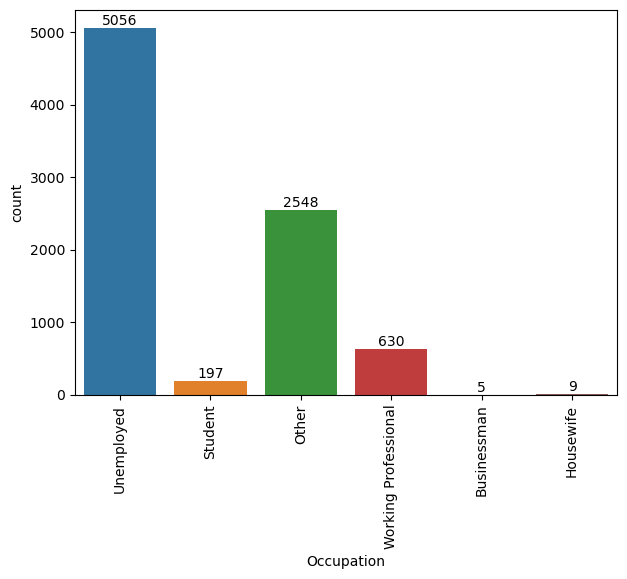

In [65]:
# Ploting total count of occupation:
plt.figure(figsize = (7,5))
ax = sns.countplot(x=df["Occupation"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

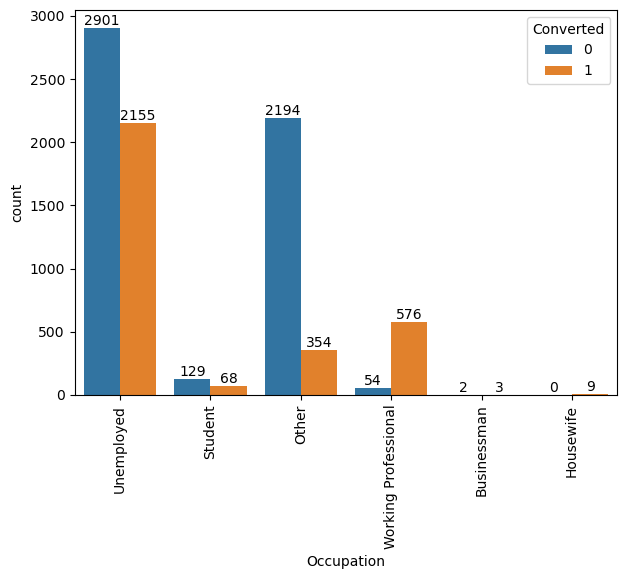

In [66]:
# Ploting total count of Occupation w.r.t Converted
plt.figure(figsize = (7,5))
ax = sns.countplot(data = df, x=df["Occupation"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

#### Observation:
Unemployed people shows highest convertion rate of 42.6% followed by working professionals with a convertion rate of 91%

#### Course Selection Reason

In [67]:
# Counts of unique values of Course Selection Reason.
df["Course_Selection_Reason"].value_counts()

Better Career Prospects      8443
Flexibility & Convenience       1
Other                           1
Name: Course_Selection_Reason, dtype: int64

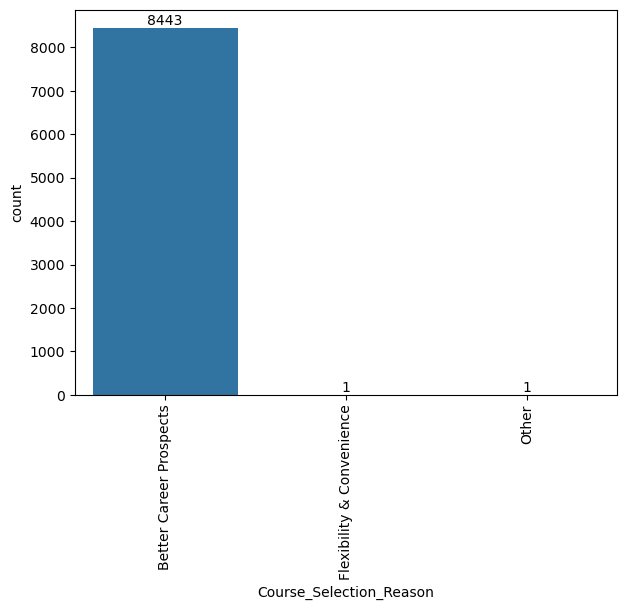

In [68]:
# Ploting total count of Course Selection Reason
plt.figure(figsize = (7,5))
ax = sns.countplot(x=df["Course_Selection_Reason"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

In [69]:
df.drop(['Course_Selection_Reason'],axis=1,inplace=True)

#### Observation:
Course Selection Reason was heavily skewed and doesnt provide any insight for the analysis.Hence we drop.

#### Free Copy Mastering Interview

In [70]:
# Counts of unique values of 'Free copy mastering interview'
df["FreeCopy_MasteringInterview"].value_counts()

No     5910
Yes    2535
Name: FreeCopy_MasteringInterview, dtype: int64

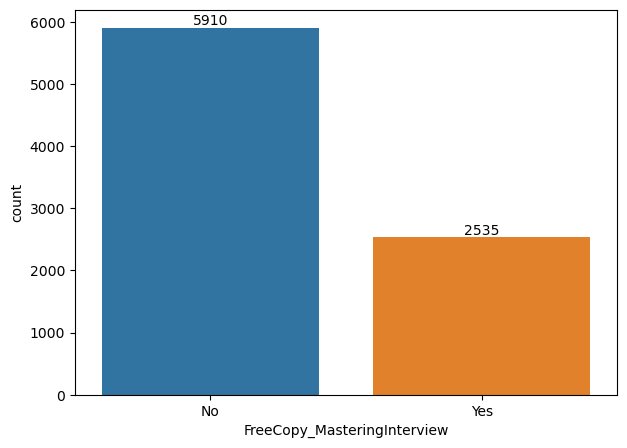

In [71]:
# Ploting total count of 'Free copy mastering interview'
plt.figure(figsize = (7,5))
ax = sns.countplot(x=df["FreeCopy_MasteringInterview"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

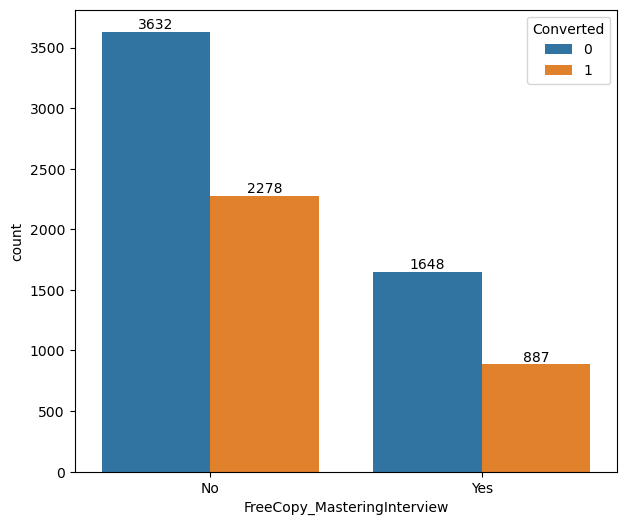

In [72]:
# Ploting total count of 'Free copy mastering interview' w.r.t 'converted'
plt.figure(figsize = (7,6))
ax = sns.countplot(data = df, x=df['FreeCopy_MasteringInterview'], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Observation:
Irrespective of downloading the Free Copy for Mastering Interview, the convertion rate is almost equal with 38.5% and 35% respectively

#### Last Notable Activity

In [73]:
# Counts of unique values in Last Notable Activity
df["Last_Notable_Activity"].value_counts()

Modified                        3108
Email Opened                    2608
SMS Sent                        2009
Page Visited on Website          238
Olark Chat Conversation          173
Email Link Clicked               160
Email Bounced                     59
Unsubscribed                      43
Unreachable                       30
Had a Phone Conversation          10
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last_Notable_Activity, dtype: int64

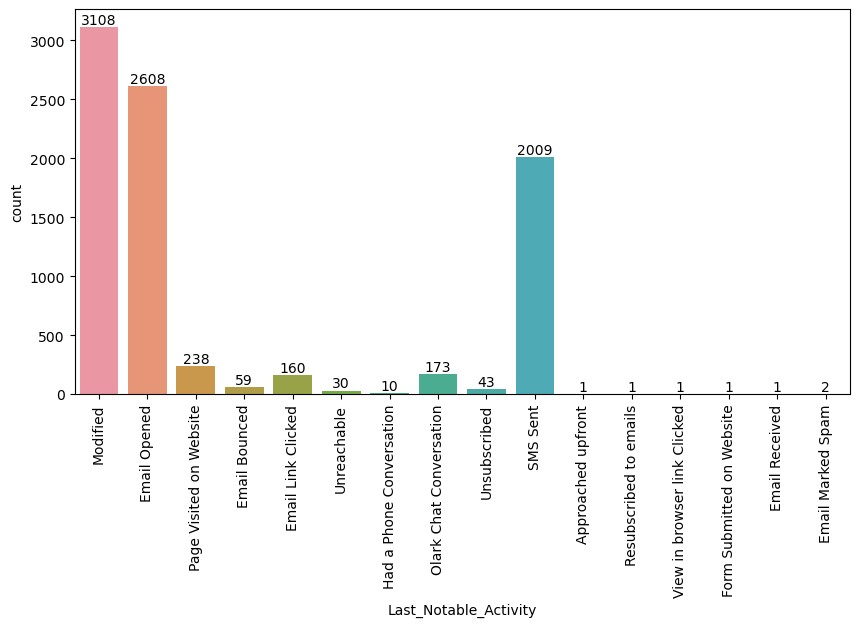

In [74]:
# Ploting total count of Last_Notable_Activity
plt.figure(figsize = (10,5))
ax = sns.countplot(x=df["Last_Notable_Activity"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

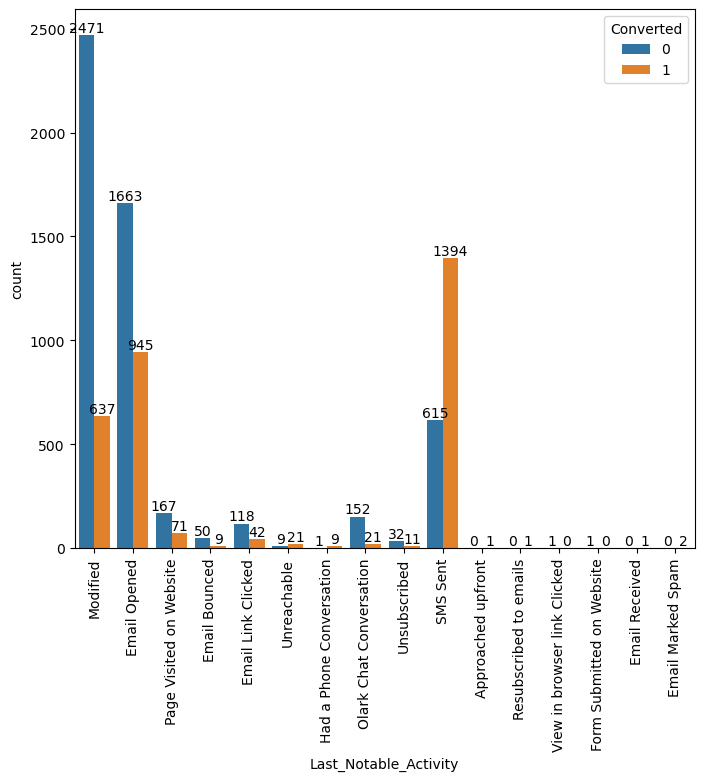

In [75]:
# Ploting total count of Last_Notable_Activity w.r.t Converted
plt.figure(figsize = (8,7))
ax = sns.countplot(data = df, x=df["Last_Notable_Activity"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)    
plt.show()

#### Observation:
The effective lead convertion is through SMS (69%) ,Email_opened (36%) and Email modified (57%)

#### Rechecking the Categorical variables

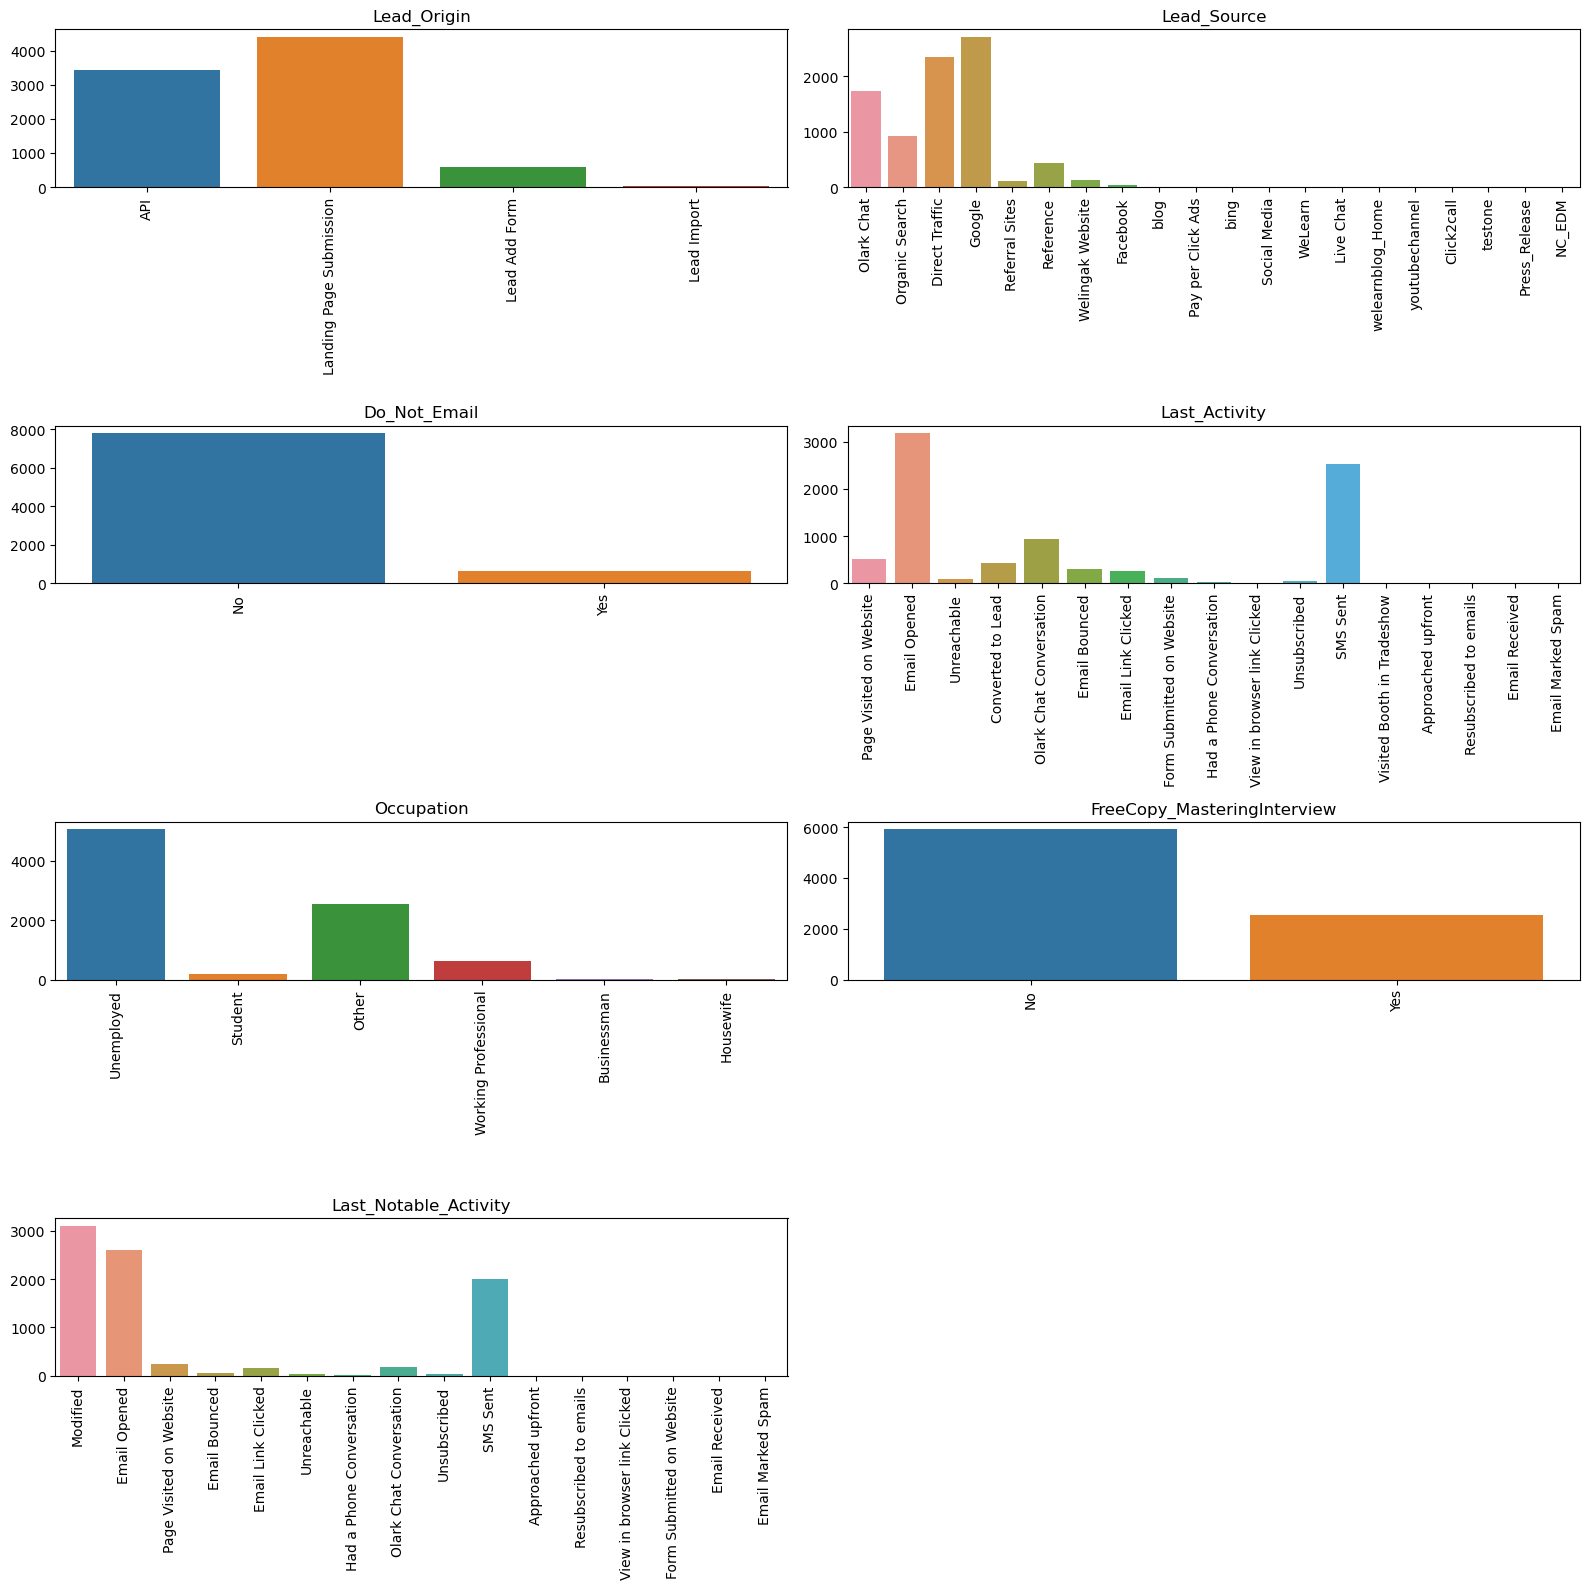

In [76]:
cat_vars = ['Lead_Origin','Lead_Source','Do_Not_Email','Last_Activity','Occupation',
            'FreeCopy_MasteringInterview','Last_Notable_Activity']
plt.figure(figsize=(16, 16))

for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i + 1)  # Changed subplot layout to 4 rows and 2 columns
    sns.countplot(x=var, data=df)
    plt.title(var)
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.xlabel(None)

plt.subplots_adjust(hspace=0.8)  # Adjust vertical spacing between subplots
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

#### Numerical Variable

#### Total Visits

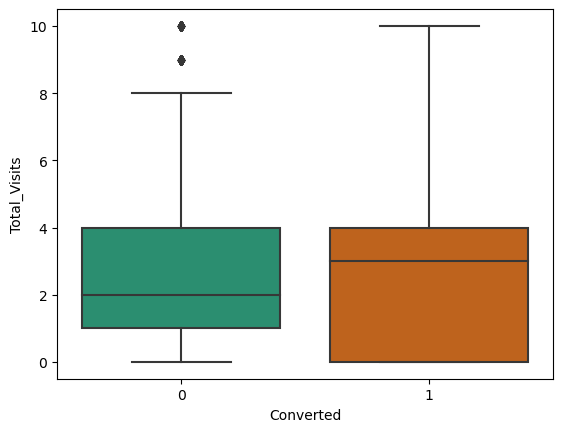

In [77]:
# plotting box plot for Total_Visits.
sns.boxplot(y = 'Total_Visits', x = 'Converted', data = df ,palette='Dark2')
plt.show()

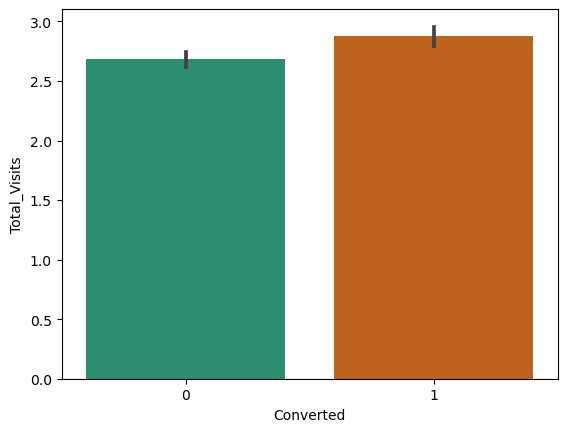

In [78]:
# plotting bar plot for Total_Visits.
sns.barplot(y = 'Total_Visits', x = 'Converted', data = df, palette='Dark2')
plt.show()

#### Observation:
Customers who has website visits shows more conversion rate

#### Time on Website

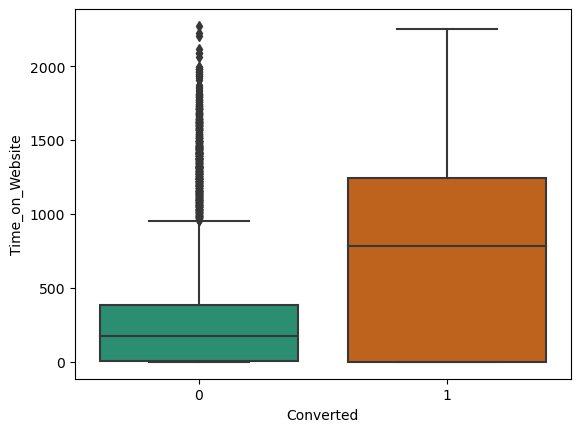

In [79]:
# plotting box plot for Time_on_Website
sns.boxplot(y = 'Time_on_Website', x = 'Converted', data = df ,palette='Dark2')
plt.show()

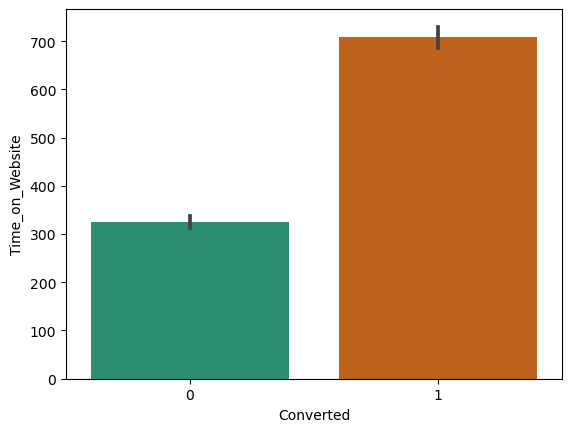

In [80]:
# plotting bar plot for Time_on_Website
sns.barplot(y = 'Time_on_Website', x = 'Converted', data = df, palette='Dark2')
plt.show()

#### Observation:
Leads who have spent more time on website are more likely to be converted.

#### Page_Views_Per_Activity

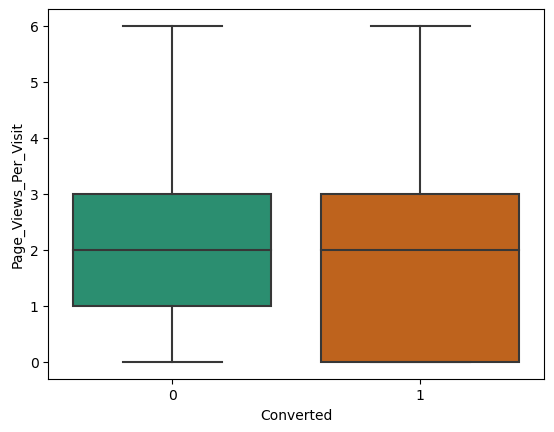

In [81]:
# plotting box plot for Page_Views_Per_Visit
sns.boxplot(y = 'Page_Views_Per_Visit', x = 'Converted', data = df ,palette='Dark2')
plt.show()

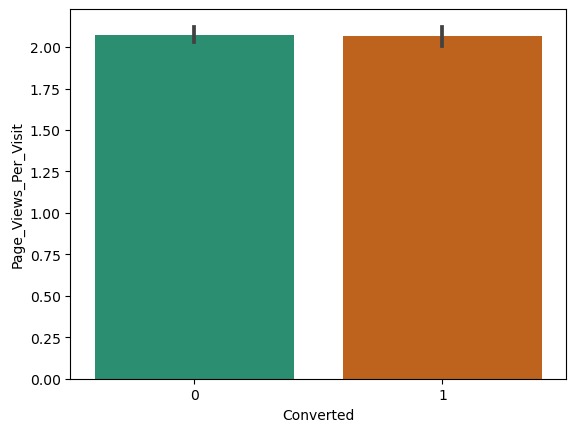

In [82]:
# plotting bar plot for Page_Views_Per_Visit
sns.barplot(y = 'Page_Views_Per_Visit', x = 'Converted', data = df, palette='Dark2')
plt.show()

#### Observation:
There are no noticable convertion rate w.r.t Page_Views_Per_Visit

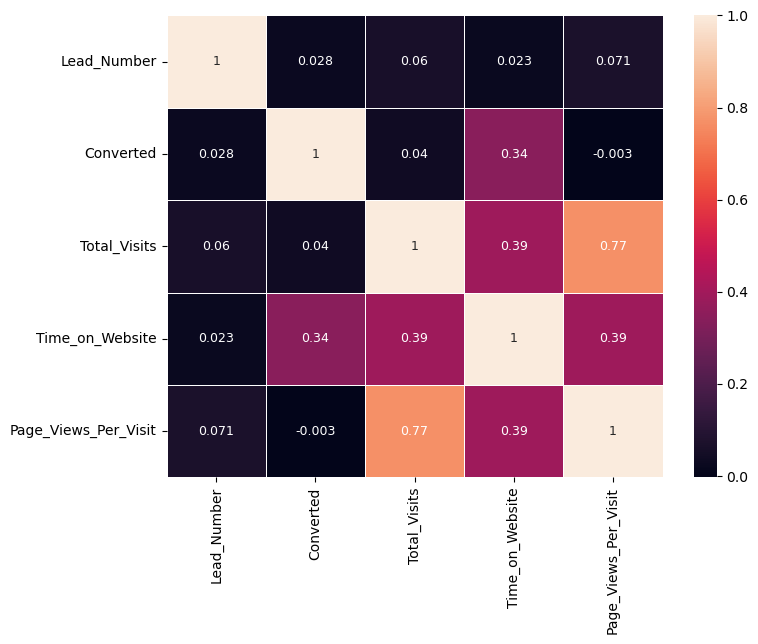

In [83]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,6))        # Size of the figure
sns.heatmap(df.corr(),annot = True, annot_kws={'size': 9,'rotation':0}, cmap="rocket", linewidth = 0.5, linecolor="white")
plt.show()

In [84]:
df.shape

(8445, 12)

### Recommendation based on EDA:
Enhance the overall lead conversion rate by directing attention towards improving the conversion rates for API and Landing Page Submission. Additionally, prioritize generating a greater influx of leads through the Lead Add Form.

To bolster the overall lead conversion rate, the client should place emphasis on elevating the conversion rates of leads originating from Google and Direct Traffic sources. Furthermore, increasing lead generation from references and the Welingak website is paramount.

It's noteworthy that customers or leads with higher visit frequency and prolonged time spent on the website exhibit a greater likelihood of conversion.

### Step 4: Data Preparation for Modeling

#### Transforming the binary variable into discrete binary levels

In [85]:
df['Do_Not_Email'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [86]:
df['FreeCopy_MasteringInterview'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [87]:
df.head(3)

Lead_Number              Lead_Origin     Lead_Source  Do_Not_Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   

   Converted  Total_Visits  Time_on_Website  Page_Views_Per_Visit  \
0          0           0.0                0                   0.0   
1          0           5.0              674                   2.5   
2          1           2.0             1532                   2.0   

             Last_Activity  Occupation  FreeCopy_MasteringInterview  \
0  Page Visited on Website  Unemployed                            0   
1             Email Opened  Unemployed                            0   
2             Email Opened     Student                            1   

  Last_Notable_Activity  
0              Modified  
1          Email Opened  
2          Email Opened

#### For categorical variables with multi-levels create dummy variables

In [88]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead_Origin','Lead_Source','Last_Activity','Occupation','Last_Notable_Activity']],drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [89]:
df.head(2)

Lead_Number Lead_Origin     Lead_Source  Do_Not_Email  Converted  \
0       660737         API      Olark Chat             0          0   
1       660728         API  Organic Search             0          0   

   Total_Visits  Time_on_Website  Page_Views_Per_Visit  \
0           0.0                0                   0.0   
1           5.0              674                   2.5   

             Last_Activity  Occupation  FreeCopy_MasteringInterview  \
0  Page Visited on Website  Unemployed                            0   
1             Email Opened  Unemployed                            0   

  Last_Notable_Activity  Lead_Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                          0                        0   
1                          0                        0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   

   Lead_Source_Referral Sites  Lead_Source_Social Media  Lead_Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   

   Lead_Source_testone  Lead_Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   

   Lead_Source_youtubechannel  Last_Activity_Converted to Lead  \
0                           0                                0   
1                           0                                0   

   Last_Activity_Email Bounced  Last_Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   

   Last_Activity_Email Marked Spam  Last_Activity_Email Opened  \
0                                0                           0   
1                                0                           1   

   Last_Activity_Email Received  Last_Activity_Form Submitted on Website  \
0                             0                                        0   
1                             0                                        0   

   Last_Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   

   Last_Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   

   Last_Activity_Page Visited on Website  \
0                                      1   
1                                      0   

   Last_Activity_Resubscribed to emails  Last_Activity_SMS Sent  \
0                                     0                       0   
1                                     0                       0   

   Last_Activity_Unreachable  Last_Activity_Unsubscribed  \
0                          0                           0   
1                          0                         

In [90]:
# We have created dummies for the below variables, so we can drop them
df.drop(['Lead_Origin','Lead_Source','Last_Activity','Occupation','Last_Notable_Activity'],axis=1,inplace=True)

In [91]:
df.head(3)

Lead_Number  Do_Not_Email  Converted  Total_Visits  Time_on_Website  \
0       660737             0          0           0.0                0   
1       660728             0          0           5.0              674   
2       660727             0          1           2.0             1532   

   Page_Views_Per_Visit  FreeCopy_MasteringInterview  \
0                   0.0                            0   
1                   2.5                            0   
2                   2.0                            1   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Direct Traffic  Lead_Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   

   Lead_Source_Google  Lead_Source_Live Chat  Lead_Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   

   Lead_Source_Olark Chat  Lead_Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   

   Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   

   Lead_Source_Reference  Lead_Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   

   Lead_Source_Social Media  Lead_Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   

   Lead_Source_testone  Lead_Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   

   Lead_Source_youtubechannel  Last_Activity_Converted to Lead  \
0                           0                                0   
1                           0                                0   
2                           0                                0   

   Last_Activity_Email Bounced  Last_Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   

   Last_Activity_Email Marked Spam  Last_Activity_Email Opened  \
0                                0                           0   
1                                0                           1   
2                                0                           1   

   Last_Activity_Email Received  Last_Activity_Form Submitted on Website  \
0                             0                                        0   
1                             0                                        0   
2                             0                                        0   

   Last_Activity_Had a Phone Conversation  \
0                              

#### Rechecking dataframe

In [92]:
df["Lead_Number"].nunique()

8445

In [93]:
df.shape

(8445, 65)

In [94]:
print(df.dtypes)

Lead_Number                                             int64
Do_Not_Email                                            int64
Converted                                               int64
Total_Visits                                          float64
Time_on_Website                                         int64
Page_Views_Per_Visit                                  float64
FreeCopy_MasteringInterview                             int64
Lead_Origin_Landing Page Submission                     uint8
Lead_Origin_Lead Add Form                               uint8
Lead_Origin_Lead Import                                 uint8
Lead_Source_Direct Traffic                              uint8
Lead_Source_Facebook                                    uint8
Lead_Source_Google                                      uint8
Lead_Source_Live Chat                                   uint8
Lead_Source_NC_EDM                                      uint8
Lead_Source_Olark Chat                                  uint8
Lead_Sou

### Step 5: Test-Train Split

In [95]:
# Putting feature variable to X
X = df.drop(['Lead_Number','Converted'], axis=1)

X.head()

Do_Not_Email  Total_Visits  Time_on_Website  Page_Views_Per_Visit  \
0             0           0.0                0                   0.0   
1             0           5.0              674                   2.5   
2             0           2.0             1532                   2.0   
3             0           1.0              305                   1.0   
4             0           2.0             1428                   1.0   

   FreeCopy_MasteringInterview  Lead_Origin_Landing Page Submission  \
0                            0                                    0   
1                            0                                    0   
2                            1                                    1   
3                            0                                    1   
4                            0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead_Source_Referral Sites  Lead_Source_Social Media  Lead_Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead_Source_Welingak Website  Lead_Source_bing  Lead_Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead_Source_testone  Lead_Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4           

In [96]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature Scaling

In [98]:
df.describe()

Lead_Number  Do_Not_Email    Converted  Total_Visits  \
count    8445.000000   8445.000000  8445.000000   8445.000000   
mean   617000.027472      0.076969     0.374778      2.754174   
std     23289.142312      0.266557     0.484094      2.330357   
min    579533.000000      0.000000     0.000000      0.000000   
25%    596376.000000      0.000000     0.000000      0.000000   
50%    615473.000000      0.000000     0.000000      2.000000   
75%    637048.000000      0.000000     1.000000      4.000000   
max    660737.000000      1.000000     1.000000     10.000000   

       Time_on_Website  Page_Views_Per_Visit  FreeCopy_MasteringInterview  \
count      8445.000000           8445.000000                  8445.000000   
mean        468.572054              2.071957                     0.300178   
std         541.698874              1.649040                     0.458362   
min           0.000000              0.000000                     0.000000   
25%           0.000000              0.000000                     0.000000   
50%         233.000000              2.000000                     0.000000   
75%         886.000000              3.000000                     1.000000   
max        2272.000000              6.000000                     1.000000   

       Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
count                          8445.000000                8445.000000   
mean                              0.521847                   0.068206   
std                               0.499552                   0.252114   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead_Origin_Lead Import  Lead_Source_Direct Traffic  \
count              8445.000000                 8445.000000   
mean                  0.003434                    0.278153   
std                   0.058503                    0.448116   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Live Chat  \
count           8445.000000         8445.000000            8445.000000   
mean               0.003552            0.321374               0.000237   
std                0.059500            0.467032               0.015388   
min                0.000000            0.000000               0.000000   
25%                0.000000            0.000000               0.000000   
50%                0.000000            0.000000               0.000000   
75%                0.000000            1.000000               0.000000   
max                1.000000            1.000000               1.000000   

       Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
count         8445.000000             8445.000000                 8445.000000   
mean             0.000118                0.206276                    0.108822   
std              0.010882                0.404655                    0.311434   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              0.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
count                    8445.000000            

In [99]:
scaler = StandardScaler()

X_train[['Total_Visits','Time_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['Total_Visits','Time_on_Website','Page_Views_Per_Visit']])

X_train.head()

Do_Not_Email  Total_Visits  Time_on_Website  Page_Views_Per_Visit  \
5279             1     -0.314975        -0.504462             -0.037025   
3099             0     -0.314975        -0.480383             -0.037025   
91               0      1.396648         1.279233             -0.340229   
1577             0     -1.170787        -0.865647             -1.249840   
487              0     -0.314975        -0.617448             -0.037025   

      FreeCopy_MasteringInterview  Lead_Origin_Landing Page Submission  \
5279                            0                                    1   
3099                            0                                    1   
91                              1                                    0   
1577                            0                                    0   
487                             0                                    0   

      Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  \
5279                          0                        0   
3099                          0                        0   
91                            0                        0   
1577                          1                        0   
487                           0                        0   

      Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
5279                           1                     0                   0   
3099                           1                     0                   0   
91                             0                     0                   0   
1577                           0                     0                   0   
487                            0                     0                   1   

      Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
5279                      0                   0                       0   
3099                      0                   0                       0   
91                        0                   0                       1   
1577                      0                   0                       0   
487                       0                   0                       0   

      Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
5279                           0                              0   
3099                           0                              0   
91                             0                              0   
1577                           0                              0   
487                            0                              0   

      Lead_Source_Press_Release  Lead_Source_Reference  \
5279                          0                      0   
3099                          0                      0   
91                            0                      0   
1577                          0                      1   
487                           0                      0   

      Lead_Source_Referral Sites  Lead_Source_Social Media  \
5279                           0                         0   
3099                           0                         0   
91                             0                         0   
1577                           0                         0   
487                            0                         0   

      Lead_Source_WeLearn  Lead_Source_Welingak Website  Lead_Source_bing  \
5279                    0                             0                 0   
3099                    0                             0                 0   
91                      0                             0                 0   
1577                    0                             0                 0   
487                     0                             0                 0   

      Lead_Source_blog  Lead_Source_testone  Lead_Source_welearnblog_Home  \
5279                 0                    0                             0   
3099                 0                    0                             0   
91        

In [100]:
### Checking the Converted Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.47779751332149

#### Observation:
It shows 37.477% Converted Rate

###  Looking at the correlation

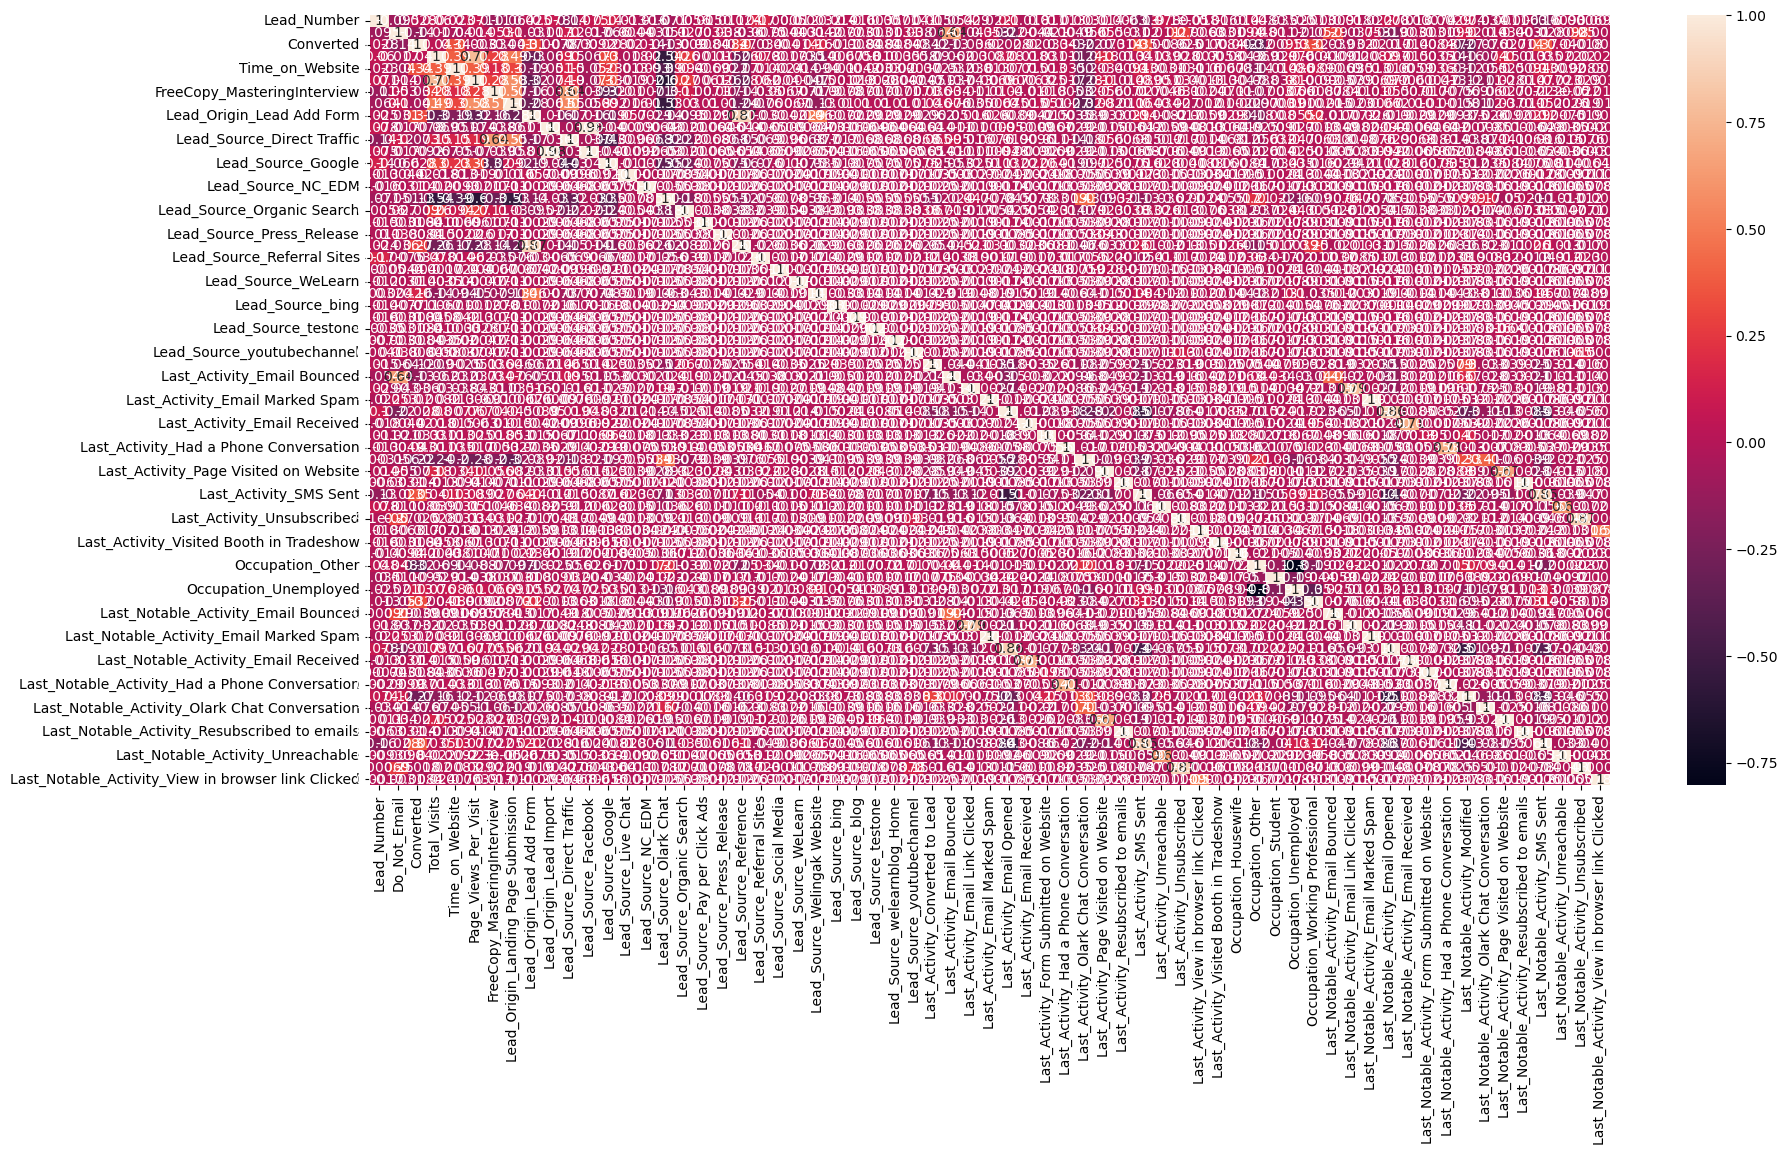

In [101]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Step 6: Model Building

#### Modeling with initial Data

In [102]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5856
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 15 Aug 2023   Deviance:                   1.2673e+05
Time:                        17:16:22   Pearson chi2:                 6.20e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               1.022e+15   7.66e+07   1.34e+07      0.000    1.02e+15    1.02e+15
Do_Not_Email                                        -6.96e+14   4.67e+06  -1.49e+08      0.000   -6.96e+14   -6.96e+14
Total_Visits                                        4.632e+13   1.49e+06    3.1e+07      0.000    4.63e+13    4.63e+13
Time_on_Website                                     2.388e+14   1.02e+06   2.33e+08      0.000    2.39e+14    2.39e+14
Page_Views_Per_Visit                                2.664e+13   1.64e+06   1.62e+07      0.000    2.66e+13    2.66e+13
FreeCopy_MasteringInterview                         6.992e+13   2.83e+06   2.47e+07      0.000    6.99e+13    6.99e+13
Lead_Origin_Landing Page Submission                 3.192e+13   2.85e+06   1.12e+07      0.000    3.19e+13    3.19e+13
Lead_Origin_Lead Add Form                           1.054e+15   4.75e+07   2.22e+07      0.000    1.05e+15    1.05e+15
Lead_Origin_Lead Import                             5.474e+13   3.44e+07   1.59e+06      0.000    5.47e+13    5.47e+13
Lead_Source_Direct Traffic                         -5.964e+13   6.73e+07  -8.87e+05      0.000   -5.96e+13   -5.96e+13
Lead_Source_Facebook                                5.474e+13   3.44e+07   1.59e+06      0.000    5.47e+13    5.47e+13
Lead_Source_Google                                 -1.322e+13   6.72e+07  -1.97e+05      0.000   -1.32e+13   -1.32e+13
Lead_Source_Live Chat                               3.328e+15   6.72e+07   4.95e+07      0.000    3.33e+15    3.33e+15
Lead_Source_NC_EDM                                  5.087e+15   9.51e+07   5.35e+07      0.000    5.09e+15    5.09e+15
Lead_Source_Olark Chat                               5.16e+14   6.73e+07   7.67e+06      0.000    5.16e+14    5.16e+14
Lead_Source_Organic Search                         -6.848e+13   6.73e+07  -1.02e+06      0.000   -6.85e+13   -6.85e+13
Lead_Source_Pay per Click Ads                      -3.381e+15    9.5e+07  -3.56e+07      0.000   -3.38e+15   -3.38e+15
Lead_Source_Press_Release                          -2.911e+15   9.53e+07  -3.06e+07      0.000   -2.91e+15   -2.91e+15
Lead_Source_Reference                               1.907e+14   4.77e+07      4e+06      0.000    1.91e+14    1.91e+14
Lead_Source_Referral Sites                         -3.186e+14   6.77e+07  -4.71e+06      0.000   -3.19e+14   -3.19e+14
Lead_Source_Social Media                            5.428e+15    9.5e+07   5.71e+07      0.000    5.43e+15    5.43e+15
Lead_Source_WeLearn                                   13.3007   6.55e-07   2.03e+07      0.000      13.301      13.301
Lead_Source_Welingak Website                        8.338e+14   4.82e+07   1.73e+07      0.000    8.34e+14  

###  Feature Selection using RFE

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [104]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('Total_Visits', False, 26),
 ('Time_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 25),
 ('FreeCopy_MasteringInterview', False, 45),
 ('Lead_Origin_Landing Page Submission', False, 31),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 40),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Facebook', False, 42),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Live Chat', False, 32),
 ('Lead_Source_NC_EDM', False, 13),
 ('Lead_Source_Olark Chat', False, 14),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Pay per Click Ads', False, 29),
 ('Lead_Source_Press_Release', False, 41),
 ('Lead_Source_Reference', False, 9),
 ('Lead_Source_Referral Sites', False, 4),
 ('Lead_Source_Social Media', False, 12),
 ('Lead_Source_WeLearn', False, 47),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 43),
 ('Lead_Source_blog', False, 30),
 ('Lead_Source_testone', False, 28),
 ('Lead_Source_welearnb

In [107]:
col = X_train.columns[rfe.support_]

In [108]:
X_train.columns[~rfe.support_]

Index(['Total_Visits', 'Page_Views_Per_Visit', 'FreeCopy_MasteringInterview',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Facebook', 'Lead_Source_Live Chat', 'Lead_Source_NC_EDM',
       'Lead_Source_Olark Chat', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Social Media',
       'Lead_Source_WeLearn', 'Lead_Source_bing', 'Lead_Source_blog',
       'Lead_Source_testone', 'Lead_Source_welearnblog_Home',
       'Lead_Source_youtubechannel', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Marked Spam',
       'Last_Activity_Email Opened', 'Last_Activity_Email Received',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Page Visited on Website',
       'Last_Activity_Resubscribed to emails', 'Last_Activity_SMS Sent',
       'Last

### Assessing the model with StatsModels

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2410.7
Date:                Tue, 15 Aug 2023   Deviance:                       4821.4
Time:                        17:16:24   Pearson chi2:                 5.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3980
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1433      0.093      1.539      0.124      -0.039       0.326
Do_Not_Email                             -1.3425      0.180     -7.475      0.000      -1.694      -0.990
Time_on_Website                           1.0562      0.041     25.467      0.000       0.975       1.138
Lead_Origin_Lead Add Form                 2.2824      0.227     10.058      0.000       1.838       2.727
Lead_Source_Direct Traffic               -1.4461      0.118    -12.265      0.000      -1.677      -1.215
Lead_Source_Google                       -1.0778      0.112     -9.634      0.000      -1.297      -0.859
Lead_Source_Organic Search               -1.2064      0.143     -8.442      0.000      -1.487      -0.926
Lead_Source_Welingak Website              2.5044      1.034      2.422      0.015       0.478       4.531
Last_Activity_Converted to Lead          -1.1696      0.203     -5.753      0.000      -1.568      -0.771
Last_Activity_Olark Chat Conversation    -1.5074      0.174     -8.669      0.000      -1.848      -1.167
Occupation_Housewife                     22.7927   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
Occupation_Other                         -1.1462      0.090    -12.681      0.000      -1.323      -0.969
Occupation_Working Professional           2.3356      0.185     12.602      0.000       1.972       2.699
Last_Notable_Activity_Email Bounced       0.5630      0.487      1.156      0.247      -0.391       1.517
Last_Notable_Activity_SMS Sent            1.4089      0.084     16.835      0.000       1.245       1.573
Last_Notable_Activity_Unreachable         2.0415      0.554      3.685      0.000       0.956       3.127
=========================================================================================================
"""

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Lead_Origin_Lead Add Form  1.49
10                       Occupation_Other  1.46
4                      Lead_Source_Google  1.39
3              Lead_Source_Direct Traffic  1.38
13         Last_Notable_Activity_SMS Sent  1.37
6            Lead_Source_Welingak Website  1.27
1                         Time_on_Website  1.25
0                            Do_Not_Email  1.22
11        Occupation_Working Professional  1.20
8   Last_Activity_Olark Chat Conversation  1.19
5              Lead_Source_Organic Search  1.16
7         Last_Activity_Converted to Lead  1.11
12    Last_Notable_Activity_Email Bounced  1.10
14      Last_Notable_Activity_Unreachable  1.01
9                    Occupation_Housewife  1.00

#### Observation:
VIF are in an acceptable range(<5).Hence, we can drop variales with high p_values.

#### Occupation_Housewife

In [111]:
# Dropping 'Occupation_Housewife' having high p-value
col = col.drop(["Occupation_Housewife"])

In [112]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.013070
3099    0.175450
91      0.816752
1577    0.819271
487     0.061061
758     0.161205
7260    0.185271
7538    0.712937
2404    0.143294
8190    0.948842
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0130698 , 0.17545024, 0.81675249, 0.81927101, 0.06106124,
       0.16120491, 0.18527054, 0.71293719, 0.14329415, 0.94884212])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Numbers'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers
0          0        0.013070          5279
1          0        0.175450          3099
2          1        0.816752            91
3          1        0.819271          1577
4          0        0.061061           487

#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers  predicted
0          0        0.013070          5279          0
1          0        0.175450          3099          0
2          1        0.816752            91          1
3          1        0.819271          1577          1
4          0        0.061061           487          0

In [116]:
from sklearn import metrics

In [117]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3283  411]
 [ 686 1531]]


In [118]:
#Observation:

#Predicted     not_converted    converted
#Actual
#not_converted        3270            365
#converted             579            708 

In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8144138047707664


### Model II

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2416.6
Date:                Tue, 15 Aug 2023   Deviance:                       4833.1
Time:                        17:16:25   Pearson chi2:                 5.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1474      0.093      1.584      0.113      -0.035       0.330
Do_Not_Email                             -1.3477      0.180     -7.506      0.000      -1.700      -0.996
Time_on_Website                           1.0559      0.041     25.486      0.000       0.975       1.137
Lead_Origin_Lead Add Form                 2.2954      0.227     10.127      0.000       1.851       2.740
Lead_Source_Direct Traffic               -1.4424      0.118    -12.245      0.000      -1.673      -1.212
Lead_Source_Google                       -1.0724      0.112     -9.596      0.000      -1.291      -0.853
Lead_Source_Organic Search               -1.1922      0.143     -8.362      0.000      -1.472      -0.913
Lead_Source_Welingak Website              2.4904      1.034      2.408      0.016       0.464       4.517
Last_Activity_Converted to Lead          -1.1780      0.203     -5.797      0.000      -1.576      -0.780
Last_Activity_Olark Chat Conversation    -1.5114      0.174     -8.692      0.000      -1.852      -1.171
Occupation_Other                         -1.1516      0.090    -12.747      0.000      -1.329      -0.975
Occupation_Working Professional           2.3288      0.185     12.566      0.000       1.966       2.692
Last_Notable_Activity_Email Bounced       0.5604      0.487      1.151      0.250      -0.394       1.514
Last_Notable_Activity_SMS Sent            1.4011      0.084     16.754      0.000       1.237       1.565
Last_Notable_Activity_Unreachable         2.0356      0.554      3.674      0.000       0.950       3.122
=========================================================================================================
"""

In [121]:
# Dropping 'Last_Notable_Activity_Email Bounced' having high p-value
col = col.drop(["Last_Notable_Activity_Email Bounced"])

In [122]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.013035
3099    0.174689
91      0.817287
1577    0.821827
487     0.061310
758     0.162526
7260    0.186736
7538    0.714733
2404    0.144500
8190    0.949303
dtype: float64

In [123]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01303536, 0.17468947, 0.81728672, 0.82182738, 0.06130957,
       0.16252615, 0.18673565, 0.7147334 , 0.14450022, 0.94930286])

In [124]:
y_train.values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Numbers'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers
0          0        0.013035          5279
1          0        0.174689          3099
2          1        0.817287            91
3          1        0.821827          1577
4          0        0.061310           487

#### Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0

In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers  predicted
0          0        0.013035          5279          0
1          0        0.174689          3099          0
2          1        0.817287            91          1
3          1        0.821827          1577          1
4          0        0.061310           487          0

In [127]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3279  415]
 [ 689 1528]]


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8132295719844358


In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Lead_Origin_Lead Add Form  1.49
9                        Occupation_Other  1.46
4                      Lead_Source_Google  1.39
3              Lead_Source_Direct Traffic  1.38
11         Last_Notable_Activity_SMS Sent  1.37
6            Lead_Source_Welingak Website  1.27
1                         Time_on_Website  1.25
10        Occupation_Working Professional  1.20
8   Last_Activity_Olark Chat Conversation  1.19
5              Lead_Source_Organic Search  1.15
0                            Do_Not_Email  1.13
7         Last_Activity_Converted to Lead  1.11
12      Last_Notable_Activity_Unreachable  1.01

### Model III

In [130]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2417.2
Date:                Tue, 15 Aug 2023   Deviance:                       4834.4
Time:                        17:16:25   Pearson chi2:                 5.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3967
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1498      0.093      1.611      0.107      -0.032       0.332
Do_Not_Email                             -1.2827      0.168     -7.628      0.000      -1.612      -0.953
Time_on_Website                           1.0559      0.041     25.490      0.000       0.975       1.137
Lead_Origin_Lead Add Form                 2.2895      0.226     10.109      0.000       1.846       2.733
Lead_Source_Direct Traffic               -1.4433      0.118    -12.255      0.000      -1.674      -1.212
Lead_Source_Google                       -1.0723      0.112     -9.596      0.000      -1.291      -0.853
Lead_Source_Organic Search               -1.1931      0.143     -8.370      0.000      -1.472      -0.914
Lead_Source_Welingak Website              2.5084      1.034      2.425      0.015       0.481       4.536
Last_Activity_Converted to Lead          -1.1803      0.203     -5.807      0.000      -1.579      -0.782
Last_Activity_Olark Chat Conversation    -1.5141      0.174     -8.709      0.000      -1.855      -1.173
Occupation_Other                         -1.1535      0.090    -12.775      0.000      -1.330      -0.976
Occupation_Working Professional           2.3334      0.186     12.564      0.000       1.969       2.697
Last_Notable_Activity_SMS Sent            1.3952      0.083     16.730      0.000       1.232       1.559
Last_Notable_Activity_Unreachable         2.0342      0.554      3.670      0.000       0.948       3.120
=========================================================================================================
"""

In [131]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.013894
3099    0.173803
91      0.817659
1577    0.821325
487     0.061346
758     0.162868
7260    0.187119
7538    0.715265
2404    0.144810
8190    0.948853
dtype: float64

In [132]:
# Reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01389418, 0.17380317, 0.81765923, 0.82132463, 0.06134639,
       0.16286845, 0.18711852, 0.71526517, 0.14481047, 0.94885341])

In [133]:
y_train.values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

#### Creating a dataframe with the actual Converted and the predicted probabilities

In [134]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Numbers'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers
0          0        0.013894          5279
1          0        0.173803          3099
2          1        0.817659            91
3          1        0.821325          1577
4          0        0.061346           487

#### Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0

In [135]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers  predicted
0          0        0.013894          5279          0
1          0        0.173803          3099          0
2          1        0.817659            91          1
3          1        0.821325          1577          1
4          0        0.061346           487          0

In [136]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3283  411]
 [ 690 1527]]


In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8137371003214346


In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Lead_Origin_Lead Add Form  1.49
9                        Occupation_Other  1.46
4                      Lead_Source_Google  1.39
3              Lead_Source_Direct Traffic  1.38
11         Last_Notable_Activity_SMS Sent  1.37
6            Lead_Source_Welingak Website  1.27
1                         Time_on_Website  1.25
10        Occupation_Working Professional  1.20
8   Last_Activity_Olark Chat Conversation  1.19
5              Lead_Source_Organic Search  1.15
0                            Do_Not_Email  1.13
7         Last_Activity_Converted to Lead  1.11
12      Last_Notable_Activity_Unreachable  1.01

#### Observation:
All variables have a good value for VIF and P-Value. So we need not drop any more variables and we can proceed with making predictions using this model.

### Step 7: Metrics beyond simply accuracy

In [139]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3283  411]
 [ 690 1527]]


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6887686062246279

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8887384948565241

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11126150514347591


In [144]:
# positive predictive value 
print (TP / float(TP+FP))

0.7879256965944272


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8263277120563806


### Plotting the ROC Curve

#### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

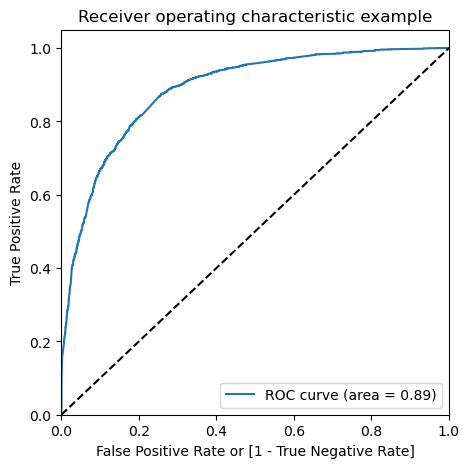

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers  predicted  0.0  0.1  0.2  0.3  \
0          0        0.013894          5279          0    1    0    0    0   
1          0        0.173803          3099          0    1    1    0    0   
2          1        0.817659            91          1    1    1    1    1   
3          1        0.821325          1577          1    1    1    1    1   
4          0        0.061346           487          0    1    0    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    1    1    1    1    1    0  
3    1    1    1    1    1    0  
4    0    0    0    0    0    0

In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.620369  0.972936  0.408771
0.2   0.2  0.759770  0.913848  0.667298
0.3   0.3  0.791744  0.872801  0.743097
0.4   0.4  0.808493  0.757330  0.839199
0.5   0.5  0.813737  0.688769  0.888738
0.6   0.6  0.804094  0.613442  0.918517
0.7   0.7  0.781255  0.502932  0.948295
0.8   0.8  0.762138  0.416328  0.969681
0.9   0.9  0.712739  0.255751  0.987006


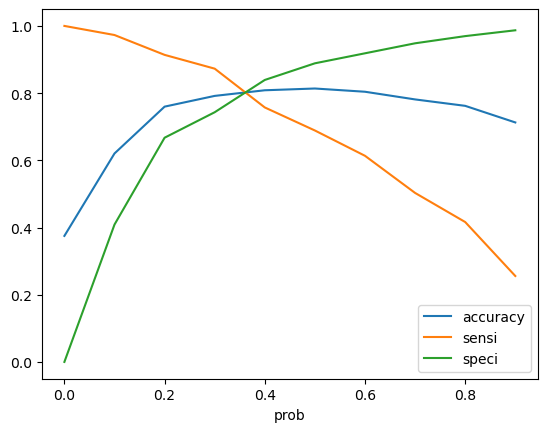

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead_Numbers  predicted  0.0  0.1  0.2  0.3  \
0          0        0.013894          5279          0    1    0    0    0   
1          0        0.173803          3099          0    1    1    0    0   
2          1        0.817659            91          1    1    1    1    1   
3          1        0.821325          1577          1    1    1    1    1   
4          0        0.061346           487          0    1    0    0    0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    1    1    1    1    1    0                1  
3    1    1    1    1    1    0                1  
4    0    0    0    0    0    0                0

In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8069700558281171

In [154]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2998,  696],
       [ 445, 1772]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7992783040144339

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.8115863562533838

In [158]:
# Calculate false postive rate - predicting lead conversion for the company
print(FP/ float(TN+FP))

0.18841364374661612


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7179902755267423


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8707522509439443


### Precision and Recall

In [161]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3283,  411],
       [ 690, 1527]], dtype=int64)

#### Precision:
TP / TP + FP

In [162]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7879256965944272

#### Recall:
TP / TP + FN

In [163]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6887686062246279

#### Using sklearn utilities for precision and recall score

In [164]:
from sklearn.metrics import precision_score, recall_score

In [165]:
?precision_score

In [166]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7879256965944272

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6887686062246279

### Precision and recall tradeoff

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      1
 18      0
 19      1
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
 30      0
 31      1
 32      0
 33      0
 34      0
 35      1
 36      1
 37      0
 38      0
 39      1
 40      1
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      1
 48      1
 49      0
 50      0
 51      1
 52      1
 53      0
 54      0
 55      1
 56      1
 57      1
 58      0
 59      1
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      0
 73      0
 74      0
 75      1
 76      0
 77      0
 78      0
 79      1
 80      0
 81      1
 82      0
 83      0
 84      0
 85      1
 86      1
 87      0
 88      0
 89      0
 90      1

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

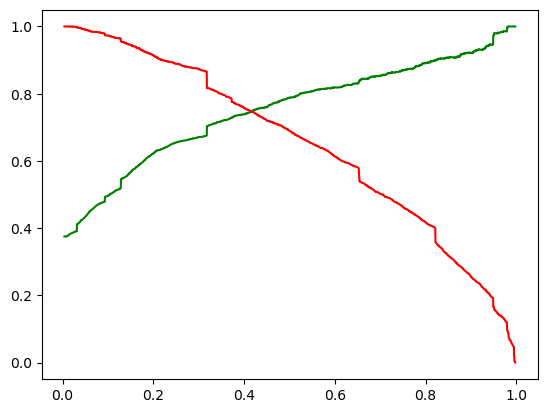

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 9: Making predictions on the test set

In [172]:
import statsmodels.api as sm

In [173]:
X_test[['Total_Visits','Time_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['Total_Visits','Time_on_Website','Page_Views_Per_Visit']])
X_test = X_test[col]
X_test.head()

Do_Not_Email  Time_on_Website  Lead_Origin_Lead Add Form  \
1926             0        -0.865647                          0   
5654             0        -0.865647                          0   
1209             0        -0.482236                          0   
5234             0        -0.084007                          0   
8497             0        -0.476679                          0   

      Lead_Source_Direct Traffic  Lead_Source_Google  \
1926                           0                   0   
5654                           0                   0   
1209                           1                   0   
5234                           1                   0   
8497                           1                   0   

      Lead_Source_Organic Search  Lead_Source_Welingak Website  \
1926                           0                             0   
5654                           0                             0   
1209                           0                             0   
5234                           0                             0   
8497                           0                             0   

      Last_Activity_Converted to Lead  Last_Activity_Olark Chat Conversation  \
1926                                0                                      0   
5654                                0                                      1   
1209                                0                                      0   
5234                                0                                      0   
8497                                0                                      0   

      Occupation_Other  Occupation_Working Professional  \
1926                 0                                1   
5654                 0                                1   
1209                 0                                1   
5234                 0                                0   
8497                 0                                0   

      Last_Notable_Activity_SMS Sent  Last_Notable_Activity_Unreachable  
1926                               0                                  0  
5654                               0                                  0  
1209                               0                                  0  
5234                               0                                  0  
8497                               0                                  0

In [174]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [175]:
y_test_pred = res.predict(X_test_sm)

In [176]:
y_test_pred[:10]

1926    0.827663
5654    0.513767
1209    0.629655
5234    0.200667
8497    0.142247
1918    0.057627
7405    0.365823
6561    0.114361
5492    0.846162
7851    0.950325
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head
y_pred_1.head()

0
1926  0.827663
5654  0.513767
1209  0.629655
5234  0.200667
8497  0.142247

In [179]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting CustID to index
y_test_df['Lead_Numbers'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

Converted  Lead_Numbers         0
0          1          1926  0.827663
1          0          5654  0.513767
2          0          1209  0.629655
3          0          5234  0.200667
4          0          8497  0.142247

In [184]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [185]:
# Rearranging the columns
new_column_order = ['Lead_Numbers', 'Converted', 'Converted_Prob']
y_pred_final = y_pred_final.reindex(columns=new_column_order)
#y_pred_final = y_pred_final.reindex_axis(['Lead_Numbers','Converted','Converted_Prob'], axis=1)

In [186]:
# Let's see the head of y_pred_final
y_pred_final.head()

Lead_Numbers  Converted  Converted_Prob
0          1926          1        0.827663
1          5654          0        0.513767
2          1209          0        0.629655
3          5234          0        0.200667
4          8497          0        0.142247

In [187]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [188]:
y_pred_final.head()

Lead_Numbers  Converted  Converted_Prob  final_predicted
0          1926          1        0.827663                1
1          5654          0        0.513767                1
2          1209          0        0.629655                1
3          5234          0        0.200667                0
4          8497          0        0.142247                0

In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8184688239936859

In [190]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1336,  250],
       [ 210,  738]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7784810126582279

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.8423707440100883

### Hot leads:
Lets consider: 
Lead_Score > 78 as 'Hot Leads'|
              Lead_Score 78-58 as 'Warm Leads'|
              Lead_Score <58 as 'Cold Leads'

In [194]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

Lead_Numbers  Converted  Converted_Prob  final_predicted  Lead_Score
0          1926          1        0.827663                1          83
1          5654          0        0.513767                1          51
2          1209          0        0.629655                1          63
3          5234          0        0.200667                0          20
4          8497          0        0.142247                0          14

In [195]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"] >= 78]
hot_leads

Lead_Numbers  Converted  Converted_Prob  final_predicted  Lead_Score
0             1926          1        0.827663                1          83
8             5492          1        0.846162                1          85
9             7851          1        0.950325                1          95
15            5882          1        0.982601                1          98
21            9026          0        0.841423                1          84
22            4155          1        0.906474                1          91
25            3837          1        0.995632                1         100
34            5822          1        0.994800                1          99
35            8943          1        0.832998                1          83
40            4505          1        0.911173                1          91
45            2662          1        0.994800                1          99
47            7707          1        0.893524                1          89
48             732          0        0.783277                1          78
50            3267          1        0.995632                1         100
54            2334          1        0.803273                1          80
58            1557          1        0.880124                1          88
60            5561          1        0.950938                1          95
67            2060          1        0.788125                1          79
87            6412          1        0.776130                1          78
91            7334          1        0.918876                1          92
93            2946          1        0.933452                1          93
95             759          0        0.830416                1          83
96            8452          1        0.881087                1          88
99            1397          1        0.982601                1          98
101           6157          1        0.930055                1          93
105           3827          1        0.842044                1          84
110           6601          1        0.890305                1          89
113            335          1        0.821325                1          82
116           8027          1        0.883386                1          88
129            808          1        0.821325                1          82
130           1299          1        0.821325                1          82
131           5826          1        0.862847                1          86
135           1578          1        0.979341                1          98
136           4663          1        0.870303                1          87
148           7641          1        0.939535                1          94
158           4403          1        0.821325                1          82
164           8257          1        0.854394                1          85
169           3321          1        0.994800                1          99
175           3739          1        0.895421                1          90
178           2313          0        0.819896                1          82
183           8330          1        0.917997                1          92
187           2673          1        0.994800                1          99
191           4525          1        0.947122                1          95
204            130          1        0.821325                1          82
208           6627          1        0.832159                1          83
216           3901          0        0.842811                1          84
220           1407          1        0.926317                1          93
227           4233          1        0.843119                1          84
229            318          1        0.989781                1          99
231           2314          1        0.873809                1          87
232           6778          1        0.975777                1          98
247           4058          1        0.995632                1         100
257           7320          1  

In [196]:
hot_leads['Lead_Score'].shape

(490,)

### Important Features from the final model

In [197]:
res.params.sort_values(ascending=False)

Lead_Source_Welingak Website             2.508447
Occupation_Working Professional          2.333358
Lead_Origin_Lead Add Form                2.289549
Last_Notable_Activity_Unreachable        2.034160
Last_Notable_Activity_SMS Sent           1.395211
Time_on_Website                          1.055896
const                                    0.149832
Lead_Source_Google                      -1.072325
Occupation_Other                        -1.153456
Last_Activity_Converted to Lead         -1.180340
Lead_Source_Organic Search              -1.193070
Do_Not_Email                            -1.282749
Lead_Source_Direct Traffic              -1.443261
Last_Activity_Olark Chat Conversation   -1.514075
dtype: float64

### Step 10: Conclusion

#### Observation (Train Data)

Data Accuracy :0.81
Data Sensitivity:0.80
Data Specificity:0.81

#### Observation (Test Data)

Data Accuracy : 0.82
Data Sensitivity:0.78
Data Specificity:0.84

### Summary